## IMPORTS

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

### Descripción de la población: Presenta el perfil demográfico básico (edad, género, región, nivel socioeconómico, etc.). 

In [8]:
df_demographics = pd.read_csv("./data/Data_processed/df_demographic_clean.csv")
df_demographics.shape

(11933, 14)

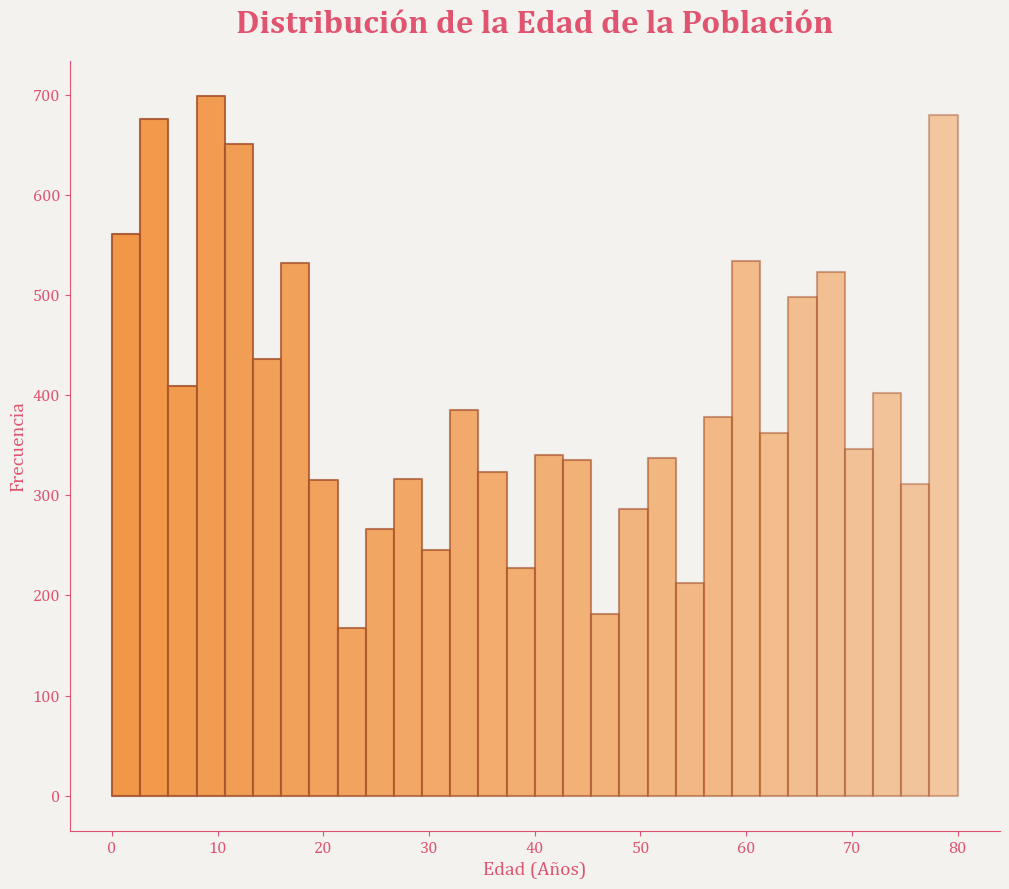

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Nueva paleta de colores
orange_light = "#F9B88E"  # Naranja claro
orange_dark = "#F28D35"   # Naranja más intenso
contour_color = "#A6542E"  # Contorno oscuro que acompaña al naranja
background_color = "#F3F2EF"  # Fondo neutro claro
text_color = "#E05470"  # Rosa para los textos

# Configuración de fuente
plt.rcParams["font.family"] = "serif"  # Usa serif que se parece a Cambria Math
plt.rcParams["font.serif"] = ["Cambria", "Times New Roman", "DejaVu Serif"]  # Opciones alternativas

# Crear figura y fondo
plt.figure(figsize=(12, 10), facecolor=background_color)

# Calcular histogram bins manualmente
data = df_demographics["Age(year)"]
counts, bins = np.histogram(data, bins=30)

# Crear barras con degradado
for i in range(len(bins) - 1):
    plt.fill_betweenx(
        y=[0, counts[i]],
        x1=bins[i],
        x2=bins[i+1],
        color=orange_dark,
        alpha=0.9 - (0.5 * i / len(bins)),  # Ajustar la opacidad para el efecto degradado
        edgecolor=contour_color,
        linewidth=1.5
    )

# Títulos y etiquetas
plt.title("Distribución de la Edad de la Población", fontsize=24, color=text_color, fontweight='bold', pad=20)
plt.xlabel("Edad (Años)", fontsize=14, color=text_color)
plt.ylabel("Frecuencia", fontsize=14, color=text_color)

# Personalización de ejes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(text_color)
plt.gca().spines['bottom'].set_color(text_color)
plt.tick_params(axis='x', colors=text_color, labelsize=12)
plt.tick_params(axis='y', colors=text_color, labelsize=12)

# Fondo uniforme de la gráfica
plt.gca().set_facecolor(background_color)

# Guardar la imagen
plt.savefig("./Figuras/distribucion_edad_degradado_fuente.png", bbox_inches="tight", dpi=300)

# Mostrar el gráfico
plt.show()



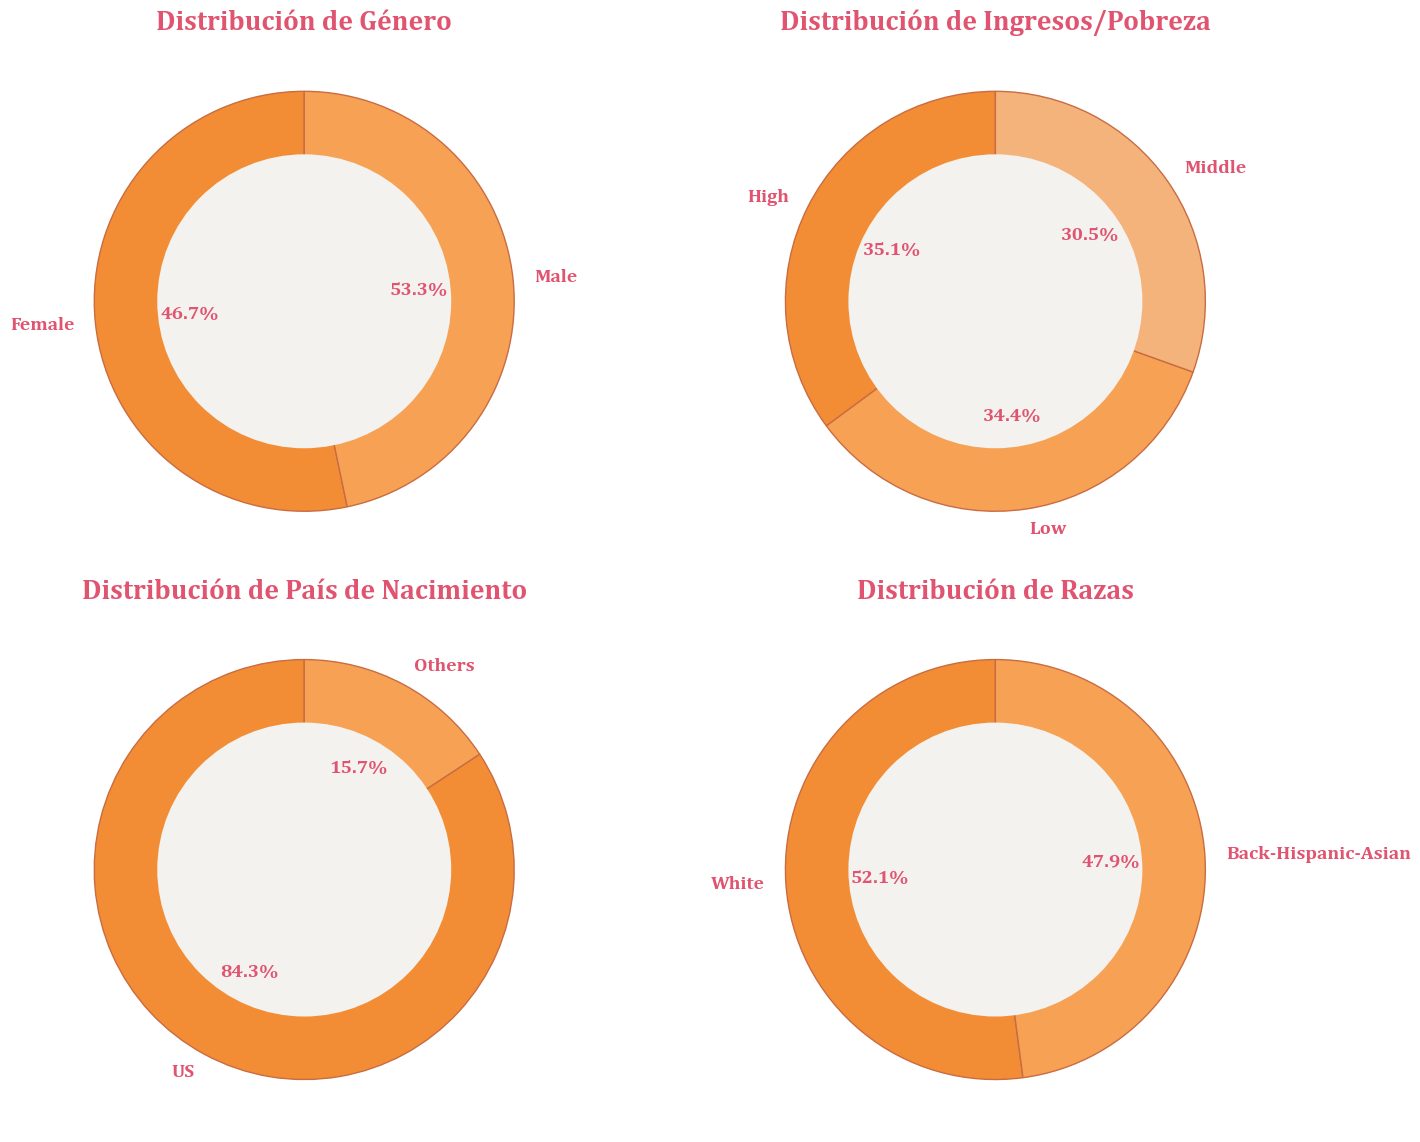

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supón que ya tienes el dataframe df_demographics cargado con las columnas correspondientes.

# Crear la figura con 2 filas y 2 columnas (cuadrícula 2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 filas, 2 columnas para los gráficos

# Crear una paleta de colores naranjas
colors  = ["#F28D35", "#F7A155", "#F5B37C", "#E07C42", "#D8692D"]

# Estilo para los títulos
title_kwargs = {
    'fontsize': 20,
    'color': "#E05470",  # Color granate
    'fontweight': 'bold',
    'loc': 'center',
    'family': 'serif'
}

# Estilo para los textos en el gráfico donut
text_kwargs = {
    'fontsize': 14,
    'color': "#E05470",  # Color granate
    'fontweight': 'bold',
    'family': 'serif'
}

# Función para dar formato al texto en los donuts con solo el porcentaje
def donut_text(pct):
    return f"{pct:.1f}%"  # Solo el porcentaje

# 1. Gráfico de Donut para Género
gender_percentage = df_demographics['Gender'].value_counts(normalize=True) * 100
axes[0, 0].pie(gender_percentage, labels=gender_percentage.index, autopct=lambda pct: donut_text(pct), 
            startangle=90, colors=colors, wedgeprops={'edgecolor': "#C96C42", 'linewidth': 1, 'linestyle': '-'},
            textprops=text_kwargs, pctdistance=-0.55)  # Mover el texto más cerca del centro (valor ajustado)
centre_circle = plt.Circle((0, 0), 0.70, fc='#F3F2EF')  # Hueco central
axes[0, 0].add_artist(centre_circle)
axes[0, 0].set_title("Distribución de Género", **title_kwargs)  # Aplicando el estilo a los títulos

# 2. Gráfico de Donut para Ingresos/Pobreza
income_percentage = df_demographics['Income_poverty'].value_counts(normalize=True) * 100
axes[0, 1].pie(income_percentage, labels=income_percentage.index, autopct=lambda pct: donut_text(pct),
            startangle=90, colors=colors, wedgeprops={'edgecolor': "#C96C42", 'linewidth': 1, 'linestyle': '-'},
            textprops=text_kwargs, pctdistance=0.55)  # Mover el texto más cerca del centro (valor ajustado)
centre_circle = plt.Circle((0, 0), 0.70, fc='#F3F2EF')  # Hueco central
axes[0, 1].add_artist(centre_circle)
axes[0, 1].set_title("Distribución de Ingresos/Pobreza", **title_kwargs)

# 3. Gráfico de Donut para País de Nacimiento
country_percentage = df_demographics['Country_of_birth'].value_counts(normalize=True) * 100
axes[1, 0].pie(country_percentage, labels=country_percentage.index, autopct=lambda pct: donut_text(pct),
               startangle=90, colors=colors, wedgeprops={'edgecolor': "#C96C42", 'linewidth': 1, 'linestyle': '-'},
               textprops=text_kwargs, pctdistance=0.55)  # Mover el texto más cerca del centro (valor ajustado)
centre_circle = plt.Circle((0, 0), 0.70, fc='#F3F2EF')  # Hueco central
axes[1, 0].add_artist(centre_circle)
axes[1, 0].set_title("Distribución de País de Nacimiento", **title_kwargs)

# 4. Gráfico de Donut para Razas
races_percentage = df_demographics['Races_simplify'].value_counts(normalize=True) * 100
axes[1, 1].pie(races_percentage, labels=races_percentage.index, autopct=lambda pct: donut_text(pct),
               startangle=90, colors=colors, wedgeprops={'edgecolor': "#C96C42", 'linewidth': 1, 'linestyle': '-'},
               textprops=text_kwargs, pctdistance=0.55)  # Mover el texto más cerca del centro (valor ajustado)
centre_circle = plt.Circle((0, 0), 0.70, fc='#F3F2EF')  # Hueco central
axes[1, 1].add_artist(centre_circle)
axes[1, 1].set_title("Distribución de Razas", **title_kwargs)

# Ajustar el layout para evitar que los gráficos se solapen
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el espacio entre los gráficos
plt.savefig("./Figuras/all_circles.png", bbox_inches="tight", dpi=300)

# Mostrar la figura combinada
plt.show()


In [11]:


# def calculate_diabetes_Diabetes_index(df):
#     """Calculate the diabetes risk index and classify risk based on percentiles (without normalization)."""
    
#     # Calculate the risk index as the average of raw values
#     df['Diabetes_index'] = (df['Insulin(pmol/L)'] + df['Fasting_Glucose(mmol/L))'] + df['Glycohemoglobin(%)']) / 3
    
#     # Calculate percentiles
#     low_percentile = np.percentile(df['Diabetes_index'], 30)  # 30th percentile
#     high_percentile = np.percentile(df['Diabetes_index'], 70)  # 70th percentile
    
#     # Classify the risk based on the index
#     def classify_risk(index_value):
#         if index_value < low_percentile:
#             return 'Low risk'
#         elif index_value > high_percentile:
#             return 'High risk'
#         else:
#             return 'Moderate risk'
    
#     # Apply the classification
#     df['Diabetes_classification'] = df['Diabetes_index'].apply(classify_risk)
    
#     return df[['SEQN','Height(m)','Weight(Kg)','Weight(year_ago)',
#                'Try_to_loss_weight','IMC','IMC_category','Year',
#                'Insulin(pmol/L)', 'Fasting_Glucose(mmol/L))', 'Glycohemoglobin(%)', 'Diabetes_index', 'Diabetes_classification']]

# # Sample DataFrame for testing
# data = {
#     'Insulin(pmol/L)': [5.0, 15.0, 20.0, 7.5, 10.0],
#     'Fasting_Glucose(mmol/L))': [90, 150, 180, 120, 110],
#     'Glycohemoglobin(%)': [5.5, 6.5, 7.0, 5.8, 6.2]
# }



# # Calculate the risk index and classify risk
# result_df = calculate_diabetes_Diabetes_index(df_diabetes)

# # Show the result
# result_df.to_csv("./data/Data_processed/df_diabetes_pob_clean.csv", index=False)


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\1714506709.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age_group', y='Income_poverty_num', data=df_demographics,
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\1714506709.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_group', y='Income_poverty_num', data=df_demographics,
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\1714506709.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_avg = df_demographics.groupby('Age_group')['Income_poverty_num'].mean().reset_index()


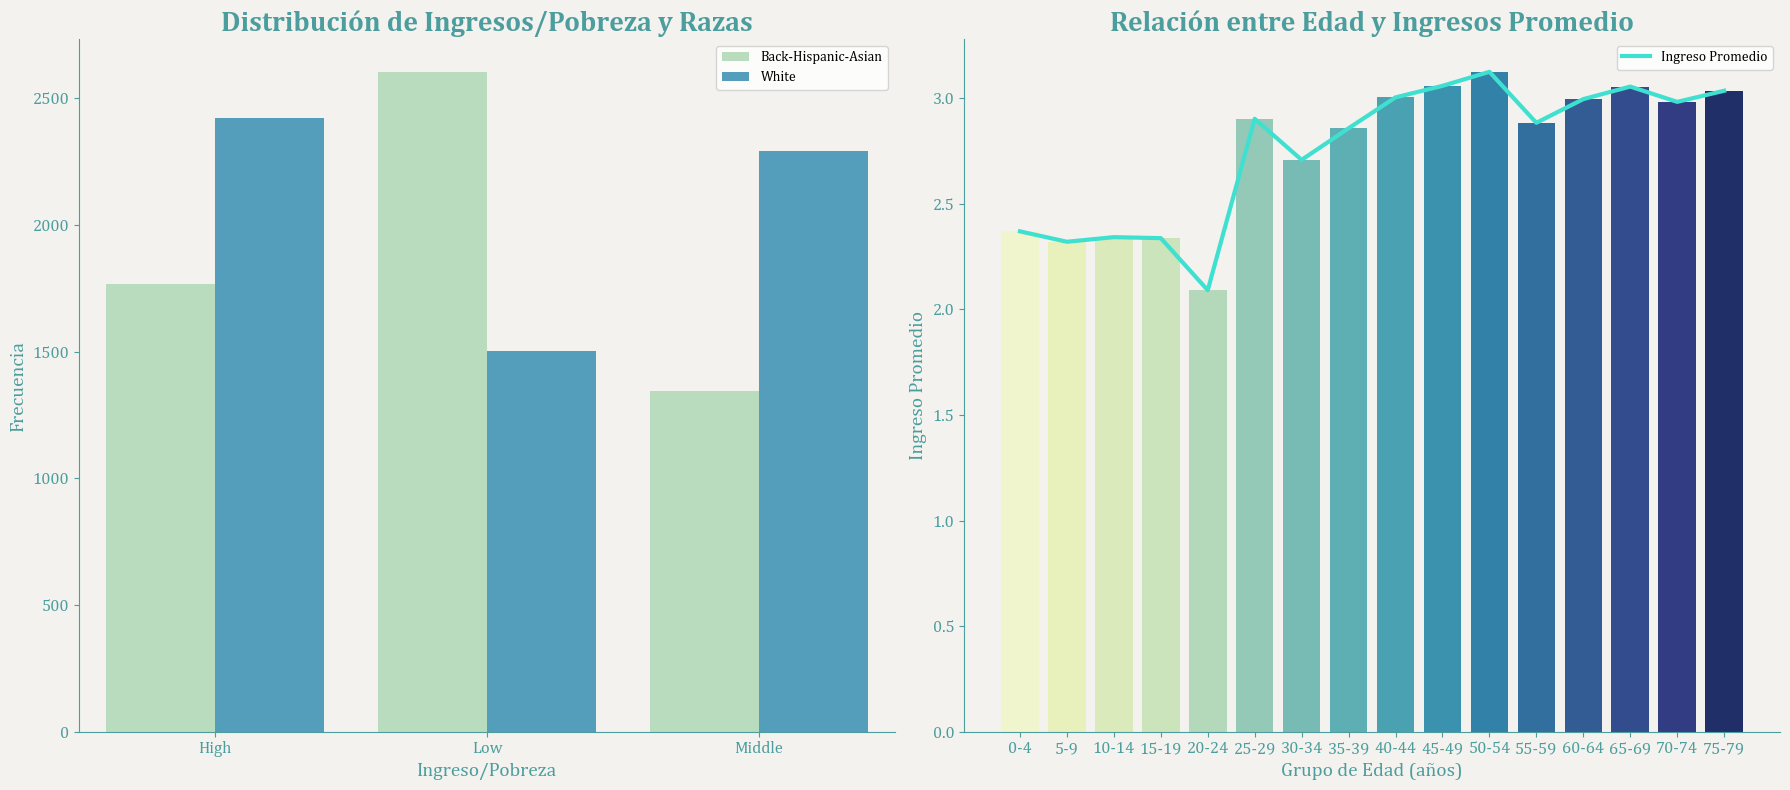

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con dos subgráficos (uno para las barras apiladas y otro para la barra con línea)
fig, axes = plt.subplots(1, 2, figsize=(18, 8), facecolor="#F3F2EF")  # Dos subgráficos, tamaño ajustado

# Gráfico 1: Barras apiladas con color armonioso
# Paleta de colores diferenciados entre tonos azul y turquesa
blue_turquoise_palette = ["#A0CBE8", "#40E0D0"]  # Colores azul y turquesa

sns.countplot(data=df_demographics, x='Income_poverty', hue='Races_simplify', 
              palette="GnBu", dodge=True, ax=axes[0])

# Estilización del gráfico 1 (barras apiladas)
axes[0].set_facecolor("#F3F2EF")  # Fondo de los ejes

axes[0].set_title('Distribución de Ingresos/Pobreza y Razas', fontsize=20, color="#4B9E9D", 
                  fontweight='bold', loc='center', family='serif')
axes[0].set_xlabel('Ingreso/Pobreza', fontsize=14, color="#4B9E9D", family='serif')
axes[0].set_ylabel('Frecuencia', fontsize=14, color="#4B9E9D", family='serif')
axes[0].tick_params(axis='x', colors="#4B9E9D", labelsize=12)
axes[0].tick_params(axis='y', colors="#4B9E9D", labelsize=12)
axes[0].spines['left'].set_color('#4B9E9D')
axes[0].spines['bottom'].set_color('#4B9E9D')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].legend()

# Gráfico 2: Barras con línea de tendencia de ingresos
# Crear una nueva columna 'Age_group' que agrupe las edades en intervalos de 5 años
max_age = int(df_demographics['Age(year)'].max())
df_demographics['Age_group'] = pd.cut(df_demographics['Age(year)'], 
                                       bins=range(0, max_age + 5, 5),
                                       right=False, 
                                       labels=[f'{i}-{i+4}' for i in range(0, max_age, 5)])

sns.barplot(x='Age_group', y='Income_poverty_num', data=df_demographics, 
            palette='YlGnBu', ci=None, estimator='mean', linewidth=2, ax=axes[1])

# Añadir la línea de tendencia de los ingresos por grupo de edad
age_income_avg = df_demographics.groupby('Age_group')['Income_poverty_num'].mean().reset_index()
axes[1].plot(age_income_avg['Age_group'], age_income_avg['Income_poverty_num'], color="#40E0D0", lw=3, label='Ingreso Promedio')

# Estilización del gráfico 2 (barras con línea de tendencia)
axes[1].set_facecolor("#F3F2EF")  # Fondo de los ejes

axes[1].set_title('Relación entre Edad y Ingresos Promedio', fontsize=20, color="#4B9E9D", 
                  fontweight='bold', loc='center', family='serif')
axes[1].set_xlabel('Grupo de Edad (años)', fontsize=14, color="#4B9E9D", family='serif')
axes[1].set_ylabel('Ingreso Promedio', fontsize=14, color="#4B9E9D", family='serif')
axes[1].tick_params(axis='x', colors="#4B9E9D", labelsize=12)
axes[1].tick_params(axis='y', colors="#4B9E9D", labelsize=12)
axes[1].spines['left'].set_color('#4B9E9D')
axes[1].spines['bottom'].set_color('#4B9E9D')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].legend()

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Guardar la figura combinada
plt.savefig("./Figuras/combined_age_income_and_demographics.png", bbox_inches="tight", dpi=300)

# Mostrar la figura combinada
plt.show()


In [13]:
df_demographics.Age_group

0        40-44
1        65-69
2        40-44
3          5-9
4          0-4
         ...  
11928      5-9
11929    45-49
11930    50-54
11931    40-44
11932      NaN
Name: Age_group, Length: 11933, dtype: category
Categories (16, object): ['0-4' < '5-9' < '10-14' < '15-19' ... '60-64' < '65-69' < '70-74' < '75-79']

In [14]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_demographics['Income_poverty'], df_demographics['Races_simplify'])

# Realizar la prueba Chi-Cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el valor p
print(f"Valor p de la prueba Chi-Cuadrado: {p}")


Valor p de la prueba Chi-Cuadrado: 3.080932651816806e-136


In [15]:
from scipy.stats import f_oneway

# Agrupar los datos por grupos de edad y obtener los ingresos promedio
age_groups = [group['Income_poverty_num'].values for name, group in df_demographics.groupby('Age_group')]

# Realizar el ANOVA de una vía
f_stat, p_value = f_oneway(*age_groups)

# Imprimir el valor p
print(f"Valor p del ANOVA: {p_value}")


Valor p del ANOVA: nan


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\3900363412.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = [group['Income_poverty_num'].values for name, group in df_demographics.groupby('Age_group')]


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\4089114475.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age_group', y='Income_poverty_num', data=df_demographics,
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\4089114475.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_group', y='Income_poverty_num', data=df_demographics,
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\4089114475.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_avg = df_demographics.groupby('Age_group')['Income_poverty_num'].mean().reset_index()


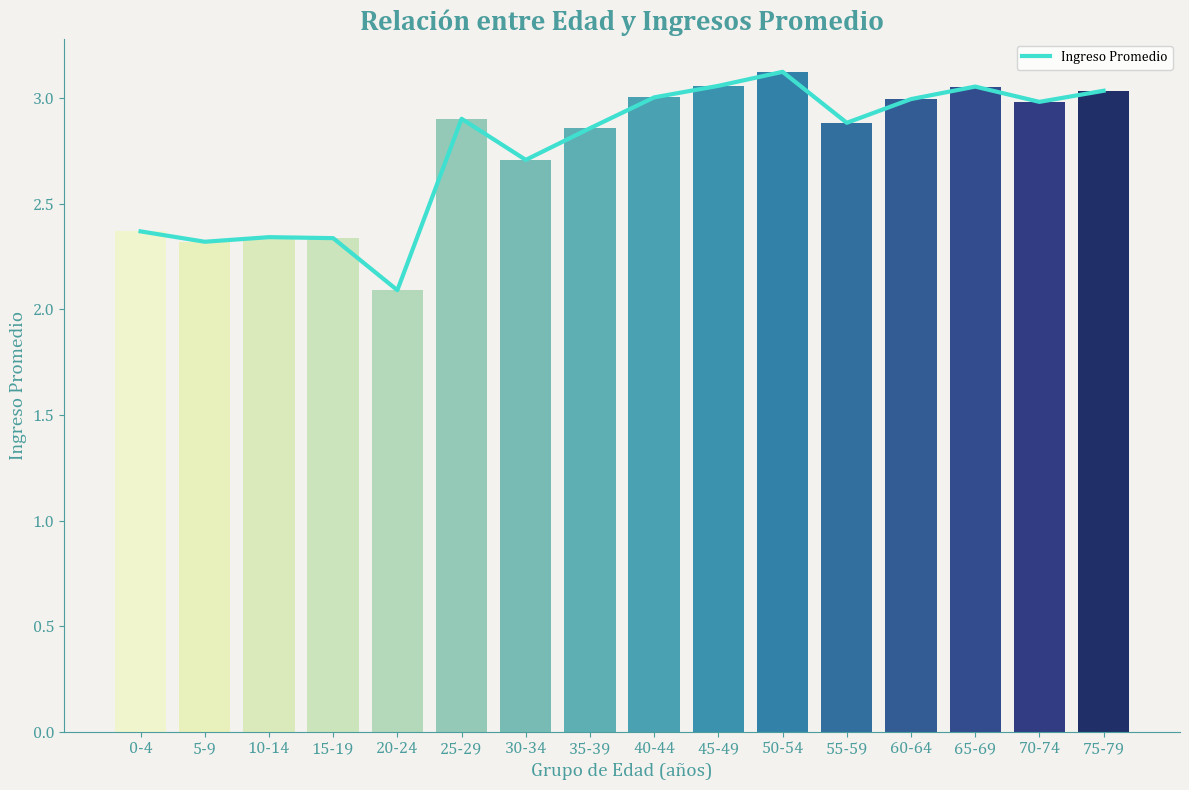

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una nueva columna 'Age_group' que agrupe las edades en intervalos de 5 años
# Convertir el valor máximo de 'Age(year)' a entero para evitar el error en range
max_age = int(df_demographics['Age(year)'].max())  # Convertir a entero

df_demographics['Age_group'] = pd.cut(df_demographics['Age(year)'], 
                                       bins=range(0, max_age + 5, 5),  # Usamos max_age convertido a entero
                                       right=False, 
                                       labels=[f'{i}-{i+4}' for i in range(0, max_age, 5)])

# Crear gráfico de barras con línea de tendencia para los ingresos
plt.figure(figsize=(12, 8))  # Tamaño adecuado para visualización

# Gráfico de barras para la edad agrupada
sns.barplot(x='Age_group', y='Income_poverty_num', data=df_demographics, 
            palette='YlGnBu', ci=None, estimator='mean', linewidth=2)

# Añadir la línea de tendencia de los ingresos por grupo de edad
# Agrupar por los grupos de edad y calcular el ingreso promedio
age_income_avg = df_demographics.groupby('Age_group')['Income_poverty_num'].mean().reset_index()

# Agregar la línea de los ingresos promedio por edad
plt.plot(age_income_avg['Age_group'], age_income_avg['Income_poverty_num'], color="#40E0D0", lw=3, label='Ingreso Promedio')

# Estilización del fondo y colores
plt.gcf().set_facecolor("#F3F2EF")  # Establecer el fondo de la figura a #F3F2EF
plt.gca().set_facecolor("#F3F2EF")  # Establecer el fondo de los ejes a #F3F2EF

# Títulos y etiquetas con color y fuente personalizados
plt.title('Relación entre Edad y Ingresos Promedio', fontsize=20, color="#4B9E9D", fontweight='bold', loc='center', family='serif')
plt.xlabel('Grupo de Edad (años)', fontsize=14, color="#4B9E9D", family='serif')
plt.ylabel('Ingreso Promedio', fontsize=14, color="#4B9E9D", family='serif')

# Personalización de los ejes
plt.xticks(fontsize=12, color="#4B9E9D", family='serif')
plt.yticks(fontsize=12, color="#4B9E9D", family='serif')

# Cambiar el color de los bordes de los ejes
plt.gca().spines['left'].set_color('#4B9E9D')
plt.gca().spines['bottom'].set_color('#4B9E9D')
plt.tick_params(axis='x', colors="#4B9E9D", labelsize=12)
plt.tick_params(axis='y', colors="#4B9E9D", labelsize=12)

# Eliminar fondo adicional fuera del gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# No mostrar la cuadrícula
plt.grid(False)

# Eliminar los ejes superiores y derechos
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Añadir la leyenda para la línea de ingreso promedio
plt.legend()

# Ajustar el layout para que no se sobrepongan los elementos
plt.tight_layout()

# Guardar el gráfico
plt.savefig("./Figuras/age_income_bars_line_grouped_turquoise_harmonized.png", bbox_inches="tight", dpi=300)

# Mostrar el gráfico
plt.show()


### ¿Cómo varían estos factores en función de los datos de salud?

## - Cholesterol

In [17]:
df_cholesterol = pd.read_csv("./data/Data_processed/df_cholesterol_pob_clean.csv")


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\1037383162.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\1037383162.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\1037383162.py:33: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


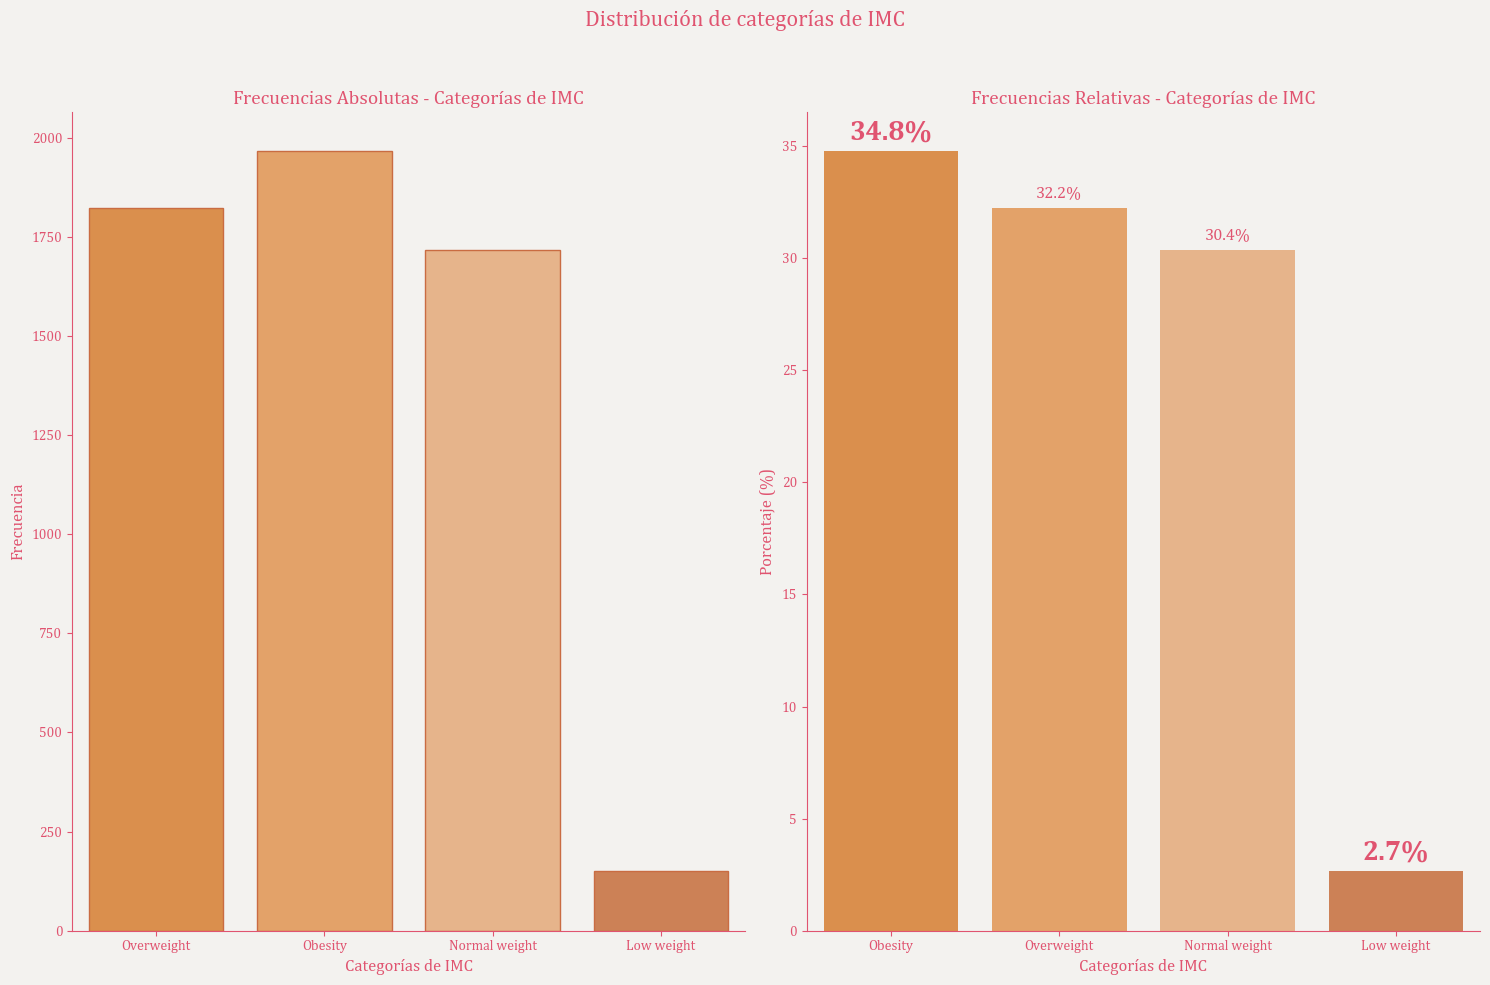

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura y los ejes (1 fila y 2 columnas)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
fig.suptitle("Distribución de categorías de IMC", fontsize=16, color="#E05470")

# Crear una paleta personalizada de naranjas
colors  = ["#F28D35", "#F7A155", "#F5B37C", "#E07C42", "#D8692D"]

# Gráfico de frecuencias absolutas utilizando sns.countplot
sns.countplot(
    x="IMC_category", 
    data=df_cholesterol, 
    ax=axs[0], 
    hue="IMC_category", 
    dodge=False,  # Mantener un único grupo de barras por categoría
    palette=colors,  # Usar paleta personalizada de naranjas
    edgecolor="#C96C42"  # Bordes de las barras con color especificado
)
axs[0].set_title("Frecuencias Absolutas - Categorías de IMC", fontsize=14, color="#E05470")
axs[0].set_xlabel("Categorías de IMC", fontsize=12, color="#E05470")
axs[0].set_ylabel("Frecuencia", fontsize=12, color="#E05470")

# Eliminar los ejes superior y derecho
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Calcular valores relativos en porcentaje
valores_relativos = df_cholesterol['IMC_category'].value_counts(normalize=True) * 100

# Gráfico de frecuencias relativas utilizando sns.barplot
sns.barplot(
    x=valores_relativos.index, 
    y=valores_relativos.values, 
    ax=axs[1], 
    palette=colors  # Usar la misma paleta para el gráfico de barras
)
axs[1].set_title("Frecuencias Relativas - Categorías de IMC", fontsize=14, color="#E05470")
axs[1].set_xlabel("Categorías de IMC", fontsize=12, color="#E05470")
axs[1].set_ylabel("Porcentaje (%)", fontsize=12, color="#E05470")

# Eliminar los valores normales (porcentaje) sobre las barras, pero dejar los valores para todas las barras
for i in range(len(valores_relativos.values)):
    # Mostrar los valores normalmente, excepto el máximo y el mínimo
    if valores_relativos.values[i] != valores_relativos.max() and valores_relativos.values[i] != valores_relativos.min():
        axs[1].text(i, valores_relativos.values[i] + 0.5, f"{valores_relativos.values[i]:.1f}%", 
                    ha='center', fontsize=12, color="#E05470")  # Valores normales

# Añadir los valores más alto y más bajo con un tamaño de fuente mayor
max_val = valores_relativos.max()
min_val = valores_relativos.min()

# Buscar los índices de los valores más alto y más bajo
max_index = valores_relativos.idxmax()
min_index = valores_relativos.idxmin()

# Ajustar la posición para evitar solapamientos con los valores normales
axs[1].text(valores_relativos.index.get_loc(max_index), max_val + 0.5, f"{max_val:.1f}%", 
            ha='center', fontsize=20, color="#E05470", fontweight='bold')

axs[1].text(valores_relativos.index.get_loc(min_index), min_val + 0.5, f"{min_val:.1f}%", 
            ha='center', fontsize=20, color="#E05470", fontweight='bold')

# Eliminar los ejes superior y derecho
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Cambiar el color de los ejes a "#E05470"
for ax in axs:
    ax.spines['left'].set_color('#E05470')
    ax.spines['bottom'].set_color('#E05470')
    ax.tick_params(axis='x', colors="#E05470")
    ax.tick_params(axis='y', colors="#E05470")

# Ajustar fondo interior y exterior
fig.patch.set_facecolor('#F3F2EF')  # Fondo exterior
for ax in axs:
    ax.set_facecolor('#F3F2EF')  # Fondo interior

# Ajustar espaciado entre subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar el gráfico
plt.show()



In [19]:
df_cholesterol.columns

Index(['SEQN', 'Total_Cholesterol(mmol/L)', 'HDL-Cholesterol(mmol/L)',
       'Cholesterol_index', 'Height(m)', 'Weight(Kg)', 'Weight(year_ago)',
       'Try_to_loss_weight', 'IMC', 'IMC_category', 'Year', 'Gender',
       'Age(year)', 'Race', 'Served_army', 'Country_of_birth',
       'Length_time_US', 'Education(adults)', 'Marital_status',
       'Pregnancy_status', 'People_in_Household', 'Income_poverty_num',
       'Income_poverty', 'Races_simplify', 'Cardiovascular_risk_1'],
      dtype='object')

In [20]:
df_cholesterol["Cardiovascular_risk_1"].value_counts()

Cardiovascular_risk_1
Normal or low    4344
Intermediate     1016
High              295
Name: count, dtype: int64

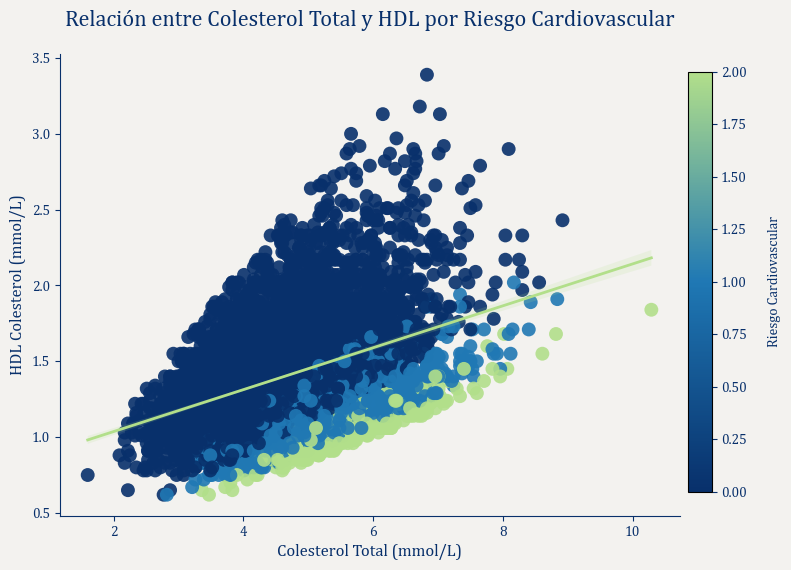

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

# Asignar valores numéricos a las categorías de riesgo cardiovascular
risk_mapping = {'Normal or low': 0, 'Intermediate': 1, 'High': 2}
df_cholesterol['Cardiovascular_risk_1_numeric'] = df_cholesterol['Cardiovascular_risk_1'].map(risk_mapping)

# Crear una paleta personalizada más oscura basada en YlGnBu
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_YlGnBu", ["#08306b", "#1f78b4", "#b2df8a"], N=256
)

# Obtener el color del valor máximo
norm = mpl.colors.Normalize(vmin=df_cholesterol['Cardiovascular_risk_1_numeric'].min(), 
                            vmax=df_cholesterol['Cardiovascular_risk_1_numeric'].max())
max_color = custom_cmap(norm(df_cholesterol['Cardiovascular_risk_1_numeric'].max()))

# Color para todos los elementos textuales y ejes
main_color = "#08306b"

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6), facecolor = '#F3F2EF')

# Crear el scatterplot sin borde en los puntos
scatter = sns.scatterplot(
    x='Total_Cholesterol(mmol/L)', 
    y='HDL-Cholesterol(mmol/L)', 
    data=df_cholesterol, 
    hue='Cardiovascular_risk_1_numeric',  # Usar la columna numérica para la barra de color
    palette=custom_cmap,  # Paleta personalizada
    s=100,  # Tamaño de los puntos
    edgecolor='none',  # Eliminar el borde de los puntos
    alpha=0.9,  # Aumentar la opacidad
    ax=ax,  
    legend=False  # Eliminar la leyenda de los puntos
)

# Añadir la línea de tendencia (regresión) con el color del valor máximo
sns.regplot(
    x='Total_Cholesterol(mmol/L)', 
    y='HDL-Cholesterol(mmol/L)', 
    data=df_cholesterol, 
    scatter=False,  # No mostrar los puntos de nuevo
    line_kws={'color': max_color, 'lw': 2},  # Usar el color máximo de la paleta
    ax=ax
)

# Títulos y etiquetas
ax.set_title('Relación entre Colesterol Total y HDL por Riesgo Cardiovascular', fontsize=16, color=main_color,
             pad=20)
ax.set_xlabel('Colesterol Total (mmol/L)', fontsize=12, color=main_color)
ax.set_ylabel('HDL Colesterol (mmol/L)', fontsize=12, color=main_color)

# Estilizar los ejes y asignar color
ax.tick_params(axis='x', colors=main_color)
ax.tick_params(axis='y', colors=main_color)

# Colorear los ejes con el color principal
ax.spines['left'].set_color(main_color)
ax.spines['bottom'].set_color(main_color)

# Eliminar los bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_facecolor('#F3F2EF')

# Eliminar el grid
ax.grid(False)

# Crear la barra de color con normalización ajustada
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Necesario para que la barra de color funcione correctamente

# Crear una posición para la barra de color
cax = fig.add_axes([0.91, 0.15, 0.03, 0.7])  # Ajusta la posición de la barra de color

# Añadir la barra de color y personalizar su color
cbar = fig.colorbar(sm, cax=cax, label="Riesgo Cardiovascular", orientation="vertical")
cbar.ax.yaxis.set_tick_params(color=main_color)  # Color de las marcas de la barra
plt.setp(cbar.ax.yaxis.get_ticklabels(), color=main_color)  # Color del texto de la barra
cbar.set_label("Riesgo Cardiovascular", color=main_color,labelpad=15)  # Color del texto de la etiqueta

plt.savefig("./Figuras/colesterol.png", bbox_inches="tight", dpi=300)


# Mostrar el gráfico
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_172\368166672.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


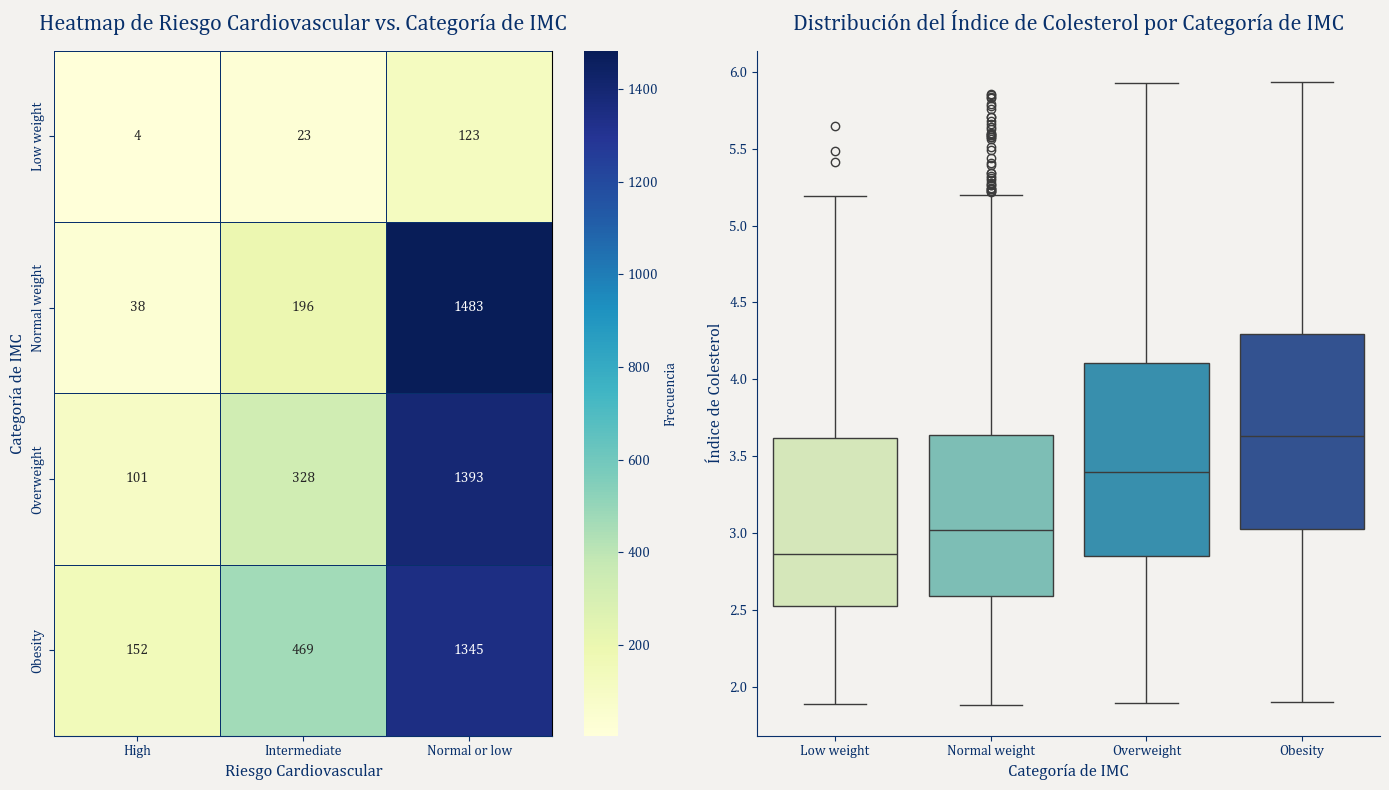

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que IMC_category tiene un orden específico
order_imc = ['Low weight', 'Normal weight', 'Overweight', 'Obesity']
df_cholesterol['IMC_category'] = pd.Categorical(df_cholesterol['IMC_category'], categories=order_imc, ordered=True)

# Configurar el tamaño de la figura y los subgráficos (2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 8), facecolor='#F3F2EF')

# --- Heatmap ---
ax1 = axes[0]

sns.heatmap(
    pd.crosstab(df_cholesterol['IMC_category'], df_cholesterol['Cardiovascular_risk_1']),
    annot=True,  # Para mostrar los valores dentro de las celdas
    cmap="YlGnBu",  # Colores azulados y verdosos
    fmt="d",  # Mostrar los valores como enteros
    linewidths=0.5,  # Líneas de separación entre celdas
    linecolor="#08306b",  # Color de las líneas
    cbar_kws={'label': 'Frecuencia'},  # Etiqueta de la barra de color
    xticklabels=True,  # Mostrar etiquetas en el eje x
    yticklabels=True,  # Mostrar etiquetas en el eje y
    ax=ax1
)

# Títulos y etiquetas del heatmap
ax1.set_title("Heatmap de Riesgo Cardiovascular vs. Categoría de IMC", fontsize=16, color="#08306b", pad=15)
ax1.set_xlabel("Riesgo Cardiovascular", fontsize=12, color="#08306b")
ax1.set_ylabel("Categoría de IMC", fontsize=12, color="#08306b")

# Estilizar los ejes
ax1.tick_params(axis='x', colors="#08306b")
ax1.tick_params(axis='y', colors="#08306b")

# Cambiar el color de las líneas de los ejes
ax1.spines['left'].set_color("#08306b")
ax1.spines['bottom'].set_color("#08306b")
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)

# Color para los ticks de la barra de color
cbar = ax1.collections[0].colorbar
cbar.set_label('Frecuencia', color='#08306b')
cbar.ax.yaxis.set_tick_params(color='#08306b')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='#08306b')

# --- Boxplot ---
ax2 = axes[1]

sns.boxplot(
    data=df_cholesterol,
    x='IMC_category',
    y='Cholesterol_index',
    palette="YlGnBu",  # Colores azulados y verdosos
    ax=ax2
)

# Títulos y etiquetas del boxplot
ax2.set_title("Distribución del Índice de Colesterol por Categoría de IMC", fontsize=16, color="#08306b", pad=15)
ax2.set_xlabel("Categoría de IMC", fontsize=12, color="#08306b")
ax2.set_ylabel("Índice de Colesterol", fontsize=12, color="#08306b")

# Estilizar los ejes
ax2.tick_params(axis='x', colors="#08306b")
ax2.tick_params(axis='y', colors="#08306b")

# Colorear los ejes con el color principal
ax2.spines['left'].set_color("#08306b")
ax2.spines['bottom'].set_color("#08306b")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Configurar el fondo interior del gráfico
ax2.set_facecolor('#F3F2EF')

# Eliminar el grid
ax2.grid(False)

# Mostrar la figura combinada
plt.tight_layout()# Asegura un buen espaciado entre los gráficos
plt.savefig("./Figuras/colesterol_index.png", bbox_inches="tight", dpi=300)
plt.show()


In [23]:
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df_cholesterol['IMC_category'], df_cholesterol['Cardiovascular_risk_1'])

# Realizar la prueba Chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados
print("Estadístico Chi-cuadrado:", chi2_stat)
print("Grados de libertad:", dof)
print("Valor p:", p_value)

# Evaluar significancia
if p_value < 0.05:
    print("Existe una asociación significativa entre el IMC y el riesgo cardiovascular.")
else:
    print("No se encontró una asociación significativa entre el IMC y el riesgo cardiovascular.")


Estadístico Chi-cuadrado: 174.35091999803439
Grados de libertad: 6
Valor p: 5.369082684942856e-35
Existe una asociación significativa entre el IMC y el riesgo cardiovascular.


In [24]:
from scipy.stats import f_oneway

# ANOVA de una vía
f_stat, p_value = f_oneway(*[df_cholesterol[df_cholesterol['IMC_category'] == category]['Cholesterol_index']
                             for category in order_imc])
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Las diferencias en el índice de colesterol entre categorías de IMC son significativas.")
else:
    print("No se encontraron diferencias significativas en el índice de colesterol entre categorías de IMC.")


Estadístico F: 125.03808804286936
Valor p: 2.0453368785960526e-78
Las diferencias en el índice de colesterol entre categorías de IMC son significativas.


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\407113932.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\407113932.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0, 1].legend().set_visible(False)
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\407113932.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\407113932.py:71: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(
C:\Users\rodri\AppData\L

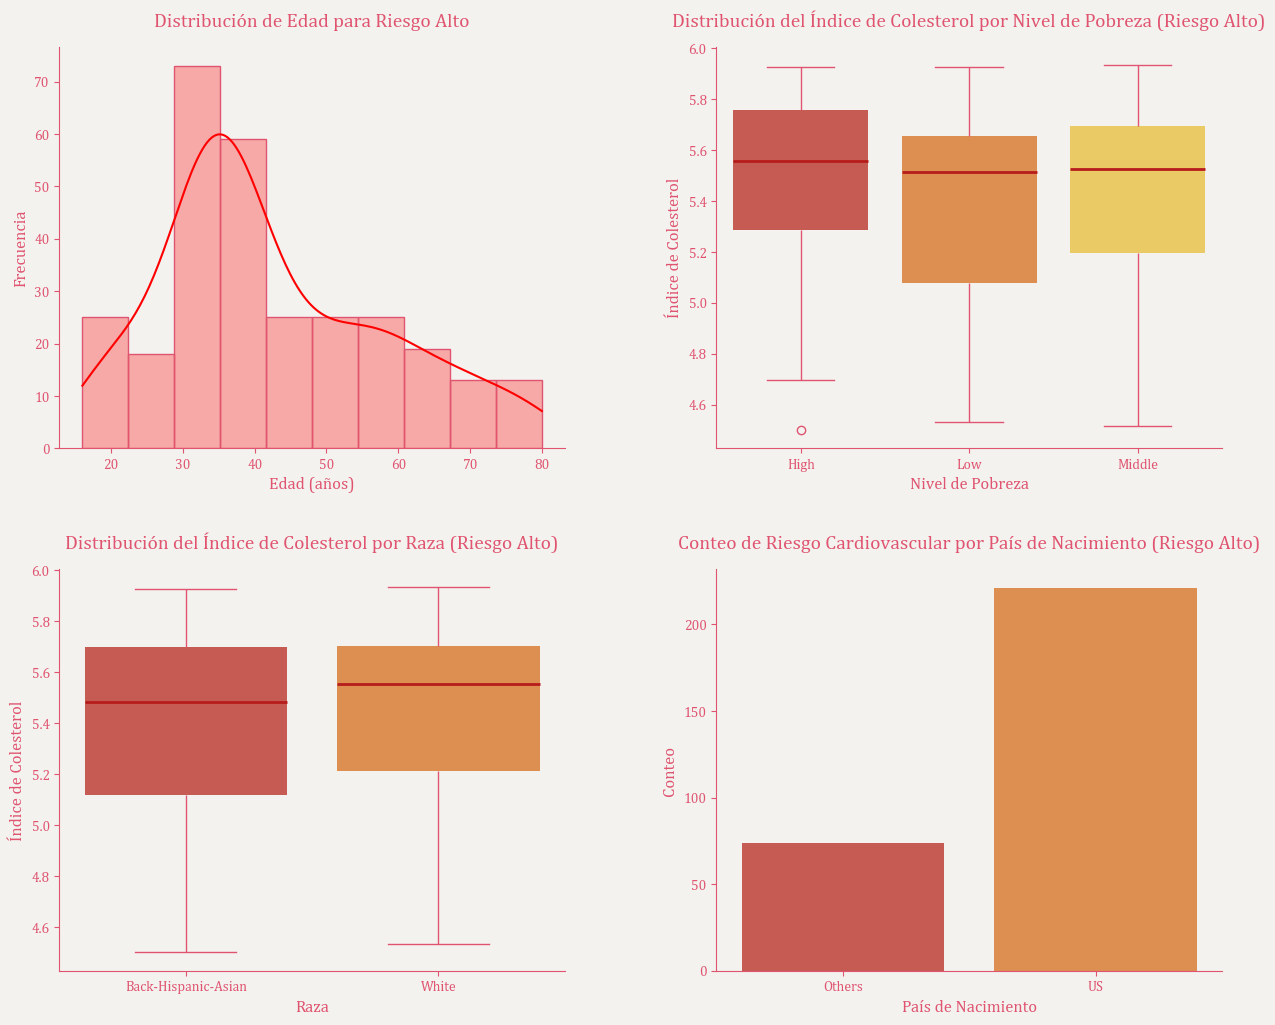

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el DataFrame para que solo tenga las filas donde Cardiovascular_risk_1 es "High"
df_high_risk = df_cholesterol[df_cholesterol['Cardiovascular_risk_1'] == 'High']

# Crear la figura y los subgráficos con tamaño adecuado para una diapositiva de PowerPoint
fig, axes = plt.subplots(2, 2, figsize=(15, 12), facecolor='#F3F2EF')

# Ajustar el espacio entre los subgráficos (menor separación entre las gráficas)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Paleta cálida más suave (rojo suave, naranja suave, amarillo suave)
soft_warm_palette = ["#D84B40", "#F48C3A", "#FFD54F"]  # Rojo suave, naranja suave y amarillo suave

# 1. Histograma de Edad (cambiar la gráfica de dispersión por este histograma)
plt.sca(axes[0, 0])  # Cambiar la referencia del gráfico al primer subgráfico
sns.histplot(
    df_high_risk['Age(year)'],
    kde=True,
    color="red",  # Color rojo
    alpha=0.3,  # Transparencia
    label="High",
    edgecolor='#E05470'  # Eliminar el contorno de las barras
)
axes[0, 0].set_title("Distribución de Edad para Riesgo Alto", fontsize=14, color="#E05470", pad=15)
axes[0, 0].set_xlabel("Edad (años)", fontsize=12, color="#E05470")
axes[0, 0].set_ylabel("Frecuencia", fontsize=12, color="#E05470")
axes[0, 0].tick_params(axis='x', colors="#E05470")
axes[0, 0].tick_params(axis='y', colors="#E05470")
axes[0, 0].set_facecolor('#F3F2EF')  # Fondo interior de la gráfica
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['left'].set_color("#E05470")
axes[0, 0].spines['bottom'].set_color("#E05470")

# Quitar la leyenda
axes[0, 0].legend().set_visible(False)

# 2. Boxplot: Cardiovascular_risk_1 vs Income_poverty
sns.boxplot(
    data=df_high_risk, 
    x='Income_poverty', 
    y='Cholesterol_index',  # Cambiar el eje Y a Cholesterol_index
    palette=soft_warm_palette,  # Usar la paleta cálida de colores suaves
    ax=axes[0, 1],
    boxprops=dict(edgecolor='none'),  # Quitar el contorno de la caja
    linecolor="#E05470",
    medianprops=dict(color="#B71C1C", linewidth=2),  # Color más intenso para la línea de la mediana (rojo más fuerte)
)
axes[0, 1].set_title("Distribución del Índice de Colesterol por Nivel de Pobreza (Riesgo Alto)", fontsize=14, color="#E05470", pad=15)
axes[0, 1].set_xlabel("Nivel de Pobreza", fontsize=12, color="#E05470")
axes[0, 1].set_ylabel("Índice de Colesterol", fontsize=12, color="#E05470")
axes[0, 1].tick_params(axis='x', colors="#E05470")
axes[0, 1].tick_params(axis='y', colors="#E05470")
axes[0, 1].set_facecolor('#F3F2EF')  # Fondo interior de la gráfica

# Eliminar los ejes superior y derecho
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)

# Cambiar el color de los bordes de los ejes
axes[0, 1].spines['left'].set_color("#E05470")
axes[0, 1].spines['bottom'].set_color("#E05470")

# Quitar la leyenda
axes[0, 1].legend().set_visible(False)

# 3. Boxplot: Cardiovascular_risk_1 vs Raza (cambiamos el eje Y a Cholesterol_index)
sns.boxplot(
    data=df_high_risk, 
    x='Races_simplify', 
    y='Cholesterol_index',  # Cambiar el eje Y a Cholesterol_index
    palette=soft_warm_palette,  # Usar la paleta cálida de colores suaves
    ax=axes[1, 0],
    linecolor="#E05470",
    boxprops=dict(edgecolor='none'),  # Quitar el contorno de la caja
    medianprops=dict(color="#B71C1C", linewidth=2),  # Color más intenso para la línea de la mediana (rojo más fuerte)
)
axes[1, 0].set_title("Distribución del Índice de Colesterol por Raza (Riesgo Alto)", fontsize=14, color="#E05470", pad=15)
axes[1, 0].set_xlabel("Raza", fontsize=12, color="#E05470")
axes[1, 0].set_ylabel("Índice de Colesterol", fontsize=12, color="#E05470")
axes[1, 0].tick_params(axis='x', colors="#E05470")
axes[1, 0].tick_params(axis='y', colors="#E05470")
axes[1, 0].set_facecolor('#F3F2EF')  # Fondo interior de la gráfica

# Eliminar los ejes superior y derecho
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)

# Cambiar el color de los bordes de los ejes
axes[1, 0].spines['left'].set_color("#E05470")
axes[1, 0].spines['bottom'].set_color("#E05470")

# Quitar la leyenda
axes[1, 0].legend().set_visible(False)

# 4. Countplot: Cardiovascular_risk_1 vs País de Nacimiento
sns.countplot(
    data=df_high_risk, 
    x='Country_of_birth', 
    hue='Country_of_birth',  # Cambiar el 'hue' a "Country_of_birth"
    palette=soft_warm_palette,  # Usar la paleta cálida de colores suaves
    ax=axes[1, 1]
)
axes[1, 1].set_title("Conteo de Riesgo Cardiovascular por País de Nacimiento (Riesgo Alto)", fontsize=14, color="#E05470", pad=15)
axes[1, 1].set_xlabel("País de Nacimiento", fontsize=12, color="#E05470")
axes[1, 1].set_ylabel("Conteo", fontsize=12, color="#E05470")
axes[1, 1].tick_params(axis='x', colors="#E05470")
axes[1, 1].tick_params(axis='y', colors="#E05470")
axes[1, 1].set_facecolor('#F3F2EF')  # Fondo interior de la gráfica

# Eliminar los ejes superior y derecho
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)

# Cambiar el color de los bordes de los ejes
axes[1, 1].spines['left'].set_color("#E05470")
axes[1, 1].spines['bottom'].set_color("#E05470")

# Quitar la leyenda
axes[1, 1].legend().set_visible(False)

# Mostrar la figura
plt.savefig("./Figuras/colesterol_demographic.png", bbox_inches="tight", dpi=300)

plt.show()


In [26]:
from scipy.stats import f_oneway, kruskal

# Agrupar los datos por nivel de pobreza
groups_income = [group['Cholesterol_index'].dropna().values 
                 for _, group in df_high_risk.groupby('Income_poverty')]

# Verificar si hay suficientes datos
if all(len(g) > 1 for g in groups_income):  
    # ANOVA
    stat_anova, p_anova = f_oneway(*groups_income)
    print(f"ANOVA: Estadístico={stat_anova:.4f}, p-valor={p_anova:.4f}")
    if p_anova < 0.05:
        print("Existen diferencias significativas entre los niveles de pobreza.")
    else:
        print("No hay diferencias significativas entre los niveles de pobreza.")
else:
    print("No hay suficientes datos para realizar el ANOVA.")


ANOVA: Estadístico=3.4669, p-valor=0.0325
Existen diferencias significativas entre los niveles de pobreza.


In [27]:
# Agrupar los datos por raza
groups_race = [group['Cholesterol_index'].dropna().values 
               for _, group in df_high_risk.groupby('Races_simplify')]

# Verificar si hay suficientes datos
if all(len(g) > 1 for g in groups_race):  
    # Kruskal-Wallis
    stat_kruskal, p_kruskal = kruskal(*groups_race)
    print(f"Kruskal-Wallis: Estadístico={stat_kruskal:.4f}, p-valor={p_kruskal:.4f}")
    if p_kruskal < 0.05:
        print("Existen diferencias significativas entre las razas.")
    else:
        print("No hay diferencias significativas entre las razas.")
else:
    print("No hay suficientes datos para realizar la prueba de Kruskal-Wallis.")


Kruskal-Wallis: Estadístico=1.4060, p-valor=0.2357
No hay diferencias significativas entre las razas.


In [28]:
df_high_risk.Cardiovascular_risk_1

0       High
33      High
100     High
113     High
205     High
        ... 
5530    High
5573    High
5636    High
5639    High
5646    High
Name: Cardiovascular_risk_1, Length: 295, dtype: object

In [29]:
from statsmodels.stats.proportion import proportions_ztest

# Contar las frecuencias de cada género
gender_counts = df_high_risk['Country_of_birth'].value_counts()

# Número total de observaciones
total = gender_counts.sum()

# Número de hombres y mujeres
male_count = gender_counts.get('US', 0)
female_count = gender_counts.get('Others', 0)

# Realizar la prueba de Z para proporciones (comparando la proporción de hombres contra una proporción teórica de 50%)
successes = [male_count, female_count]
n = [total, total]  # El total es el mismo para ambos grupos
stat, p_value = proportions_ztest(successes, n, value=0.5)

# Mostrar resultados
print(f"Estadístico Z: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("La proporción de hombres en el grupo de alto riesgo cardiovascular difiere significativamente del 50%.")
else:
    print("No hay diferencias significativas en la proporción de hombres en el grupo de alto riesgo cardiovascular.")



Estadístico Z: -0.0412
p-valor: 0.9672
No hay diferencias significativas en la proporción de hombres en el grupo de alto riesgo cardiovascular.


In [30]:
# Crear un nuevo DataFrame con proporciones relativas
df_rel = (
    df_high_risk
    .groupby(["Gender", "Cardiovascular_risk_1"])
    .size()
    .reset_index(name='count')
)

# Calcular proporciones dentro de cada grupo de "Income_poverty"
df_rel['proportion'] = df_rel.groupby('Gender')['count'].transform(lambda x: x / x.sum())
df_rel


,Gender,Cardiovascular_risk_1,count,proportion
0,Female,High,140,1.0
1,Male,High,155,1.0


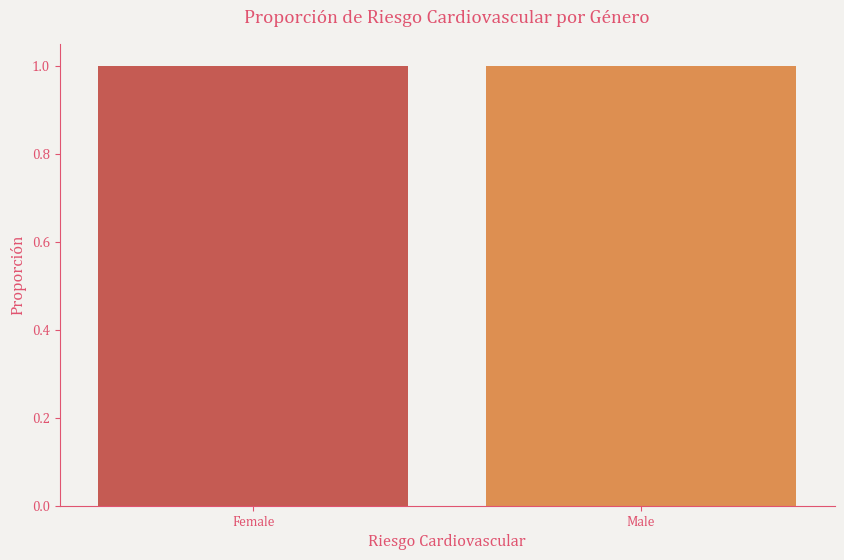

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los datos de riesgo alto
df_high = df_rel[df_rel['Cardiovascular_risk_1'] == 'High']

# Crear el gráfico de barras con el filtro para "High"
plt.figure(figsize=(10, 6),facecolor='#F3F2EF')
sns.barplot(
    data=df_high,
    x="Gender",
    y="proportion",
    hue="Gender",
    palette=["#D84B40", "#F48C3A"]  # Colores cálidos suaves (rojo y naranja)
)

# Títulos y etiquetas con el mismo estilo de colores
plt.title("Proporción de Riesgo Cardiovascular por Género", fontsize=14, color="#E05470", pad=15)
plt.xlabel("Riesgo Cardiovascular", fontsize=12, color="#E05470")
plt.ylabel("Proporción", fontsize=12, color="#E05470")

# Configuración de los ejes con el mismo color y sin bordes de arriba y derecha
plt.gca().tick_params(axis='x', colors="#E05470")
plt.gca().tick_params(axis='y', colors="#E05470")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color("#E05470")
plt.gca().spines['bottom'].set_color("#E05470")
plt.gca().set_facecolor('#F3F2EF')  # Fondo interior de la gráfica

# Establecer el fondo interior del gráfico
plt.gca().set_facecolor('#F3F2EF')

plt.savefig("./Figuras/gender_colesterol.png", bbox_inches="tight", dpi=300)

# Mostrar el gráfico
plt.show()


In [32]:
from statsmodels.stats.proportion import proportions_ztest

# Contar las frecuencias de cada género
gender_counts = df_high['Gender'].value_counts()

# Número total de observaciones
total = gender_counts.sum()

# Número de hombres y mujeres
male_count = gender_counts.get('Male', 0)
female_count = gender_counts.get('Female', 0)

# Realizar la prueba de Z para proporciones (comparando la proporción de hombres contra una proporción teórica de 50%)
successes = [male_count, female_count]
n = [total, total]  # El total es el mismo para ambos grupos
stat, p_value = proportions_ztest(successes, n, value=0.5)

# Mostrar resultados
print(f"Estadístico Z: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("La proporción de hombres en el grupo de alto riesgo cardiovascular difiere significativamente del 50%.")
else:
    print("No hay diferencias significativas en la proporción de hombres en el grupo de alto riesgo cardiovascular.")


Estadístico Z: -1.0000
p-valor: 0.3173
No hay diferencias significativas en la proporción de hombres en el grupo de alto riesgo cardiovascular.


In [33]:
df_diabetes = pd.read_csv("./data/Data_processed/df_diabetes_pob_clean.csv")
df_diabetes.info()

df_diabetes["Diabetes_classification"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      2975 non-null   float64
 1   Height(m)                 2975 non-null   float64
 2   Weight(Kg)                2975 non-null   float64
 3   Weight(year_ago)          2975 non-null   float64
 4   Try_to_loss_weight        2975 non-null   float64
 5   IMC                       2975 non-null   float64
 6   IMC_category              2975 non-null   object 
 7   Year                      2975 non-null   int64  
 8   Insulin(pmol/L)           2975 non-null   float64
 9   Fasting_Glucose(mmol/L))  2975 non-null   float64
 10  Glycohemoglobin(%)        2975 non-null   float64
 11  Diabetes_index            2975 non-null   float64
 12  Diabetes_classification   2975 non-null   object 
 13  Gender                    2975 non-null   object 
 14  Age(year

0           High risk
1           High risk
2           High risk
3       Moderate risk
4       Moderate risk
            ...      
2970    Moderate risk
2971         Low risk
2972        High risk
2973        High risk
2974         Low risk
Name: Diabetes_classification, Length: 2975, dtype: object

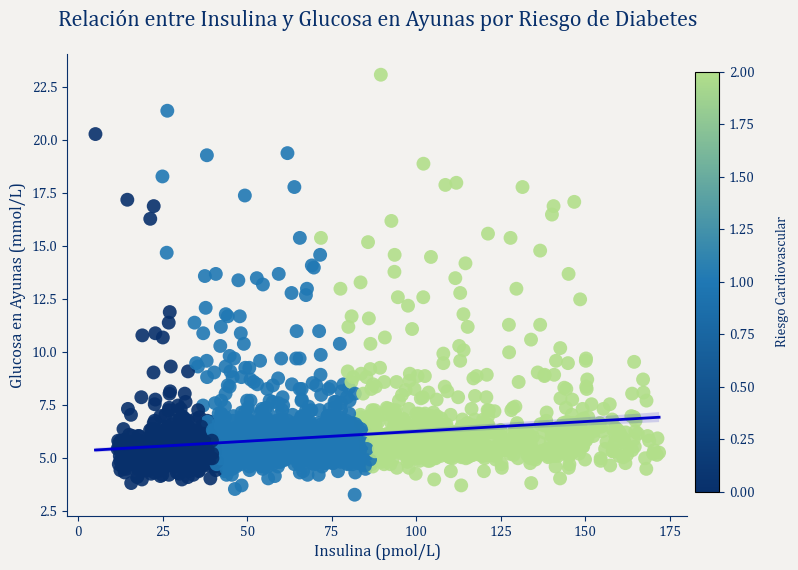

In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

# Suponiendo que tienes df_diabetes cargado y con las columnas adecuadas

# Asignar valores numéricos a las categorías de riesgo cardiovascular
risk_mapping = {'Low risk': 0, 'Moderate risk': 1, 'High risk': 2}
df_diabetes['Diabetes_risk_num'] = df_diabetes['Diabetes_classification'].map(risk_mapping)

# Crear una paleta personalizada más oscura basada en YlGnBu
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "custom_YlGnBu", ["#08306b", "#1f78b4", "#b2df8a"], N=256
)

# Obtener el color del valor máximo
norm = mpl.colors.Normalize(vmin=df_diabetes['Diabetes_risk_num'].min(), 
                            vmax=df_diabetes['Diabetes_risk_num'].max())
max_color = custom_cmap(norm(df_diabetes['Diabetes_risk_num'].max()))

# Color para todos los elementos textuales y ejes
main_color = "#08306b"

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6), facecolor='#F3F2EF')

# Crear el scatterplot usando la normalización para los colores
scatter = sns.scatterplot(
    x='Insulin(pmol/L)', 
    y='Fasting_Glucose(mmol/L))', 
    data=df_diabetes, 
    hue='Diabetes_risk_num',  # Usar la columna numérica para la barra de color
    palette=custom_cmap,  # Aplicar la paleta personalizada
    s=100,  # Tamaño de los puntos
    edgecolor='none',  # Eliminar el borde de los puntos
    alpha=0.9,  # Aumentar la opacidad
    ax=ax,  
    legend=False  # Eliminar la leyenda de los puntos
)

# Añadir la línea de tendencia (regresión) con el color azul oscuro
sns.regplot(
    x='Insulin(pmol/L)', 
    y='Fasting_Glucose(mmol/L))', 
    data=df_diabetes, 
    scatter=False,  # No mostrar los puntos de nuevo
    line_kws={'color': "mediumblue", 'lw': 2},  # Línea de tendencia en azul oscuro
    ax=ax
)

# Títulos y etiquetas
ax.set_title('Relación entre Insulina y Glucosa en Ayunas por Riesgo de Diabetes', fontsize=16, color=main_color,
             pad=20)
ax.set_xlabel('Insulina (pmol/L)', fontsize=12, color=main_color)
ax.set_ylabel('Glucosa en Ayunas (mmol/L)', fontsize=12, color=main_color)

# Estilizar los ejes y asignar color
ax.tick_params(axis='x', colors=main_color)
ax.tick_params(axis='y', colors=main_color)

# Colorear los ejes con el color principal
ax.spines['left'].set_color(main_color)
ax.spines['bottom'].set_color(main_color)

# Eliminar los bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_facecolor('#F3F2EF')

# Eliminar el grid
ax.grid(False)

# Crear la barra de color con normalización ajustada
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Necesario para que la barra de color funcione correctamente

# Crear una posición para la barra de color
cax = fig.add_axes([0.91, 0.15, 0.03, 0.7])  # Ajusta la posición de la barra de color

# Añadir la barra de color y personalizar su color
cbar = fig.colorbar(sm, cax=cax, label="Riesgo Cardiovascular", orientation="vertical")
cbar.ax.yaxis.set_tick_params(color=main_color)  # Color de las marcas de la barra
plt.setp(cbar.ax.yaxis.get_ticklabels(), color=main_color)  # Color del texto de la barra
cbar.set_label("Riesgo Cardiovascular", color=main_color, labelpad=15)  # Color del texto de la etiqueta

# Mostrar el gráfico
plt.show()


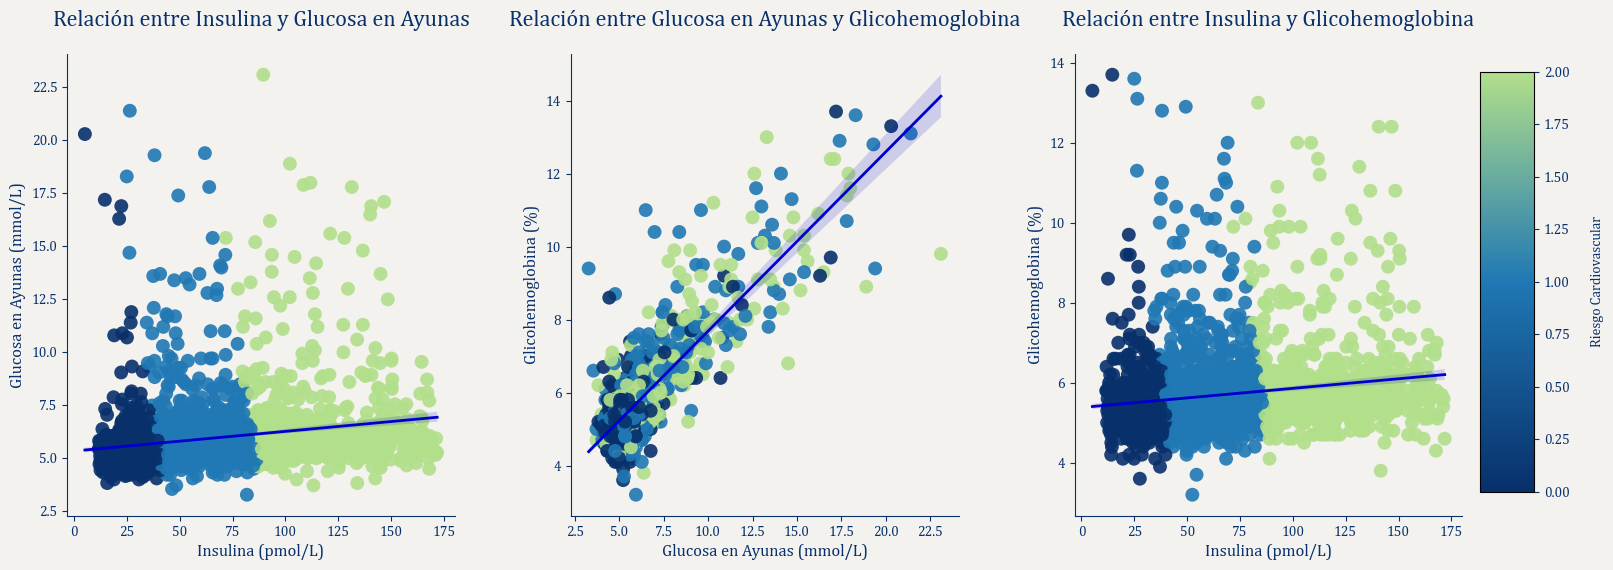

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Asumiendo que ya tienes df_diabetes cargado

# Asignar valores numéricos a las categorías de riesgo cardiovascular
risk_mapping = {'Low risk': 0, 'Moderate risk': 1, 'High risk': 2}
df_diabetes['Diabetes_risk_num'] = df_diabetes['Diabetes_classification'].map(risk_mapping)

# Crear una paleta personalizada más oscura basada en YlGnBu
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "custom_YlGnBu", ["#08306b", "#1f78b4", "#b2df8a"], N=256
)

# Obtener el color del valor máximo
norm = mpl.colors.Normalize(vmin=df_diabetes['Diabetes_risk_num'].min(), 
                            vmax=df_diabetes['Diabetes_risk_num'].max())
max_color = custom_cmap(norm(df_diabetes['Diabetes_risk_num'].max()))

# Color para todos los elementos textuales y ejes
main_color = "#08306b"

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='#F3F2EF')

# Función para crear cada gráfico
def create_scatter_plot(x, y, ax, xlabel, ylabel, title):
    # Crear el scatterplot con el estilo deseado
    sns.scatterplot(
        x=x, 
        y=y, 
        data=df_diabetes, 
        hue='Diabetes_risk_num',  
        palette=custom_cmap,  
        s=100,  
        edgecolor='none',  
        alpha=0.9,  
        ax=ax,  
        legend=False  
    )

    # Añadir la línea de tendencia (regresión) con el color azul oscuro
    sns.regplot(
        x=x, 
        y=y, 
        data=df_diabetes, 
        scatter=False,  
        line_kws={'color': "mediumblue", 'lw': 2},  
        ax=ax
    )

    # Títulos y etiquetas
    ax.set_title(title, fontsize=16, color=main_color, pad=20)
    ax.set_xlabel(xlabel, fontsize=12, color=main_color)
    ax.set_ylabel(ylabel, fontsize=12, color=main_color)

    # Estilizar los ejes y asignar color
    ax.tick_params(axis='x', colors=main_color)
    ax.tick_params(axis='y', colors=main_color)

    # Colorear los ejes con el color principal
    ax.spines['left'].set_color(main_color)
    ax.spines['bottom'].set_color(main_color)

    # Eliminar los bordes superior y derecho
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_facecolor('#F3F2EF')

    # Eliminar el grid
    ax.grid(False)

# Crear los tres scatterplots en las subgráficas
create_scatter_plot(
    'Insulin(pmol/L)', 
    'Fasting_Glucose(mmol/L))', 
    axes[0], 
    'Insulina (pmol/L)', 
    'Glucosa en Ayunas (mmol/L)', 
    'Relación entre Insulina y Glucosa en Ayunas'
)

create_scatter_plot(
    'Fasting_Glucose(mmol/L))', 
    'Glycohemoglobin(%)', 
    axes[1], 
    'Glucosa en Ayunas (mmol/L)', 
    'Glicohemoglobina (%)', 
    'Relación entre Glucosa en Ayunas y Glicohemoglobina'
)

create_scatter_plot(
    'Insulin(pmol/L)', 
    'Glycohemoglobin(%)', 
    axes[2], 
    'Insulina (pmol/L)', 
    'Glicohemoglobina (%)', 
    'Relación entre Insulina y Glicohemoglobina'
)

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(wspace=0.3)

# Crear la barra de color con normalización ajustada
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Necesario para que la barra de color funcione correctamente

# Crear una posición para la barra de color
cax = fig.add_axes([0.91, 0.15, 0.03, 0.7])  # Ajusta la posición de la barra de color

# Añadir la barra de color y personalizar su color
cbar = fig.colorbar(sm, cax=cax, label="Riesgo Cardiovascular", orientation="vertical")
cbar.ax.yaxis.set_tick_params(color=main_color)  # Color de las marcas de la barra
plt.setp(cbar.ax.yaxis.get_ticklabels(), color=main_color)  # Color del texto de la barra
cbar.set_label("Riesgo Cardiovascular", color=main_color, labelpad=15)  # Color del texto de la etiqueta

# Mostrar el gráfico
plt.savefig("./Figuras/diabetes_variables.png", bbox_inches="tight", dpi=300)

plt.show()


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\2802736335.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


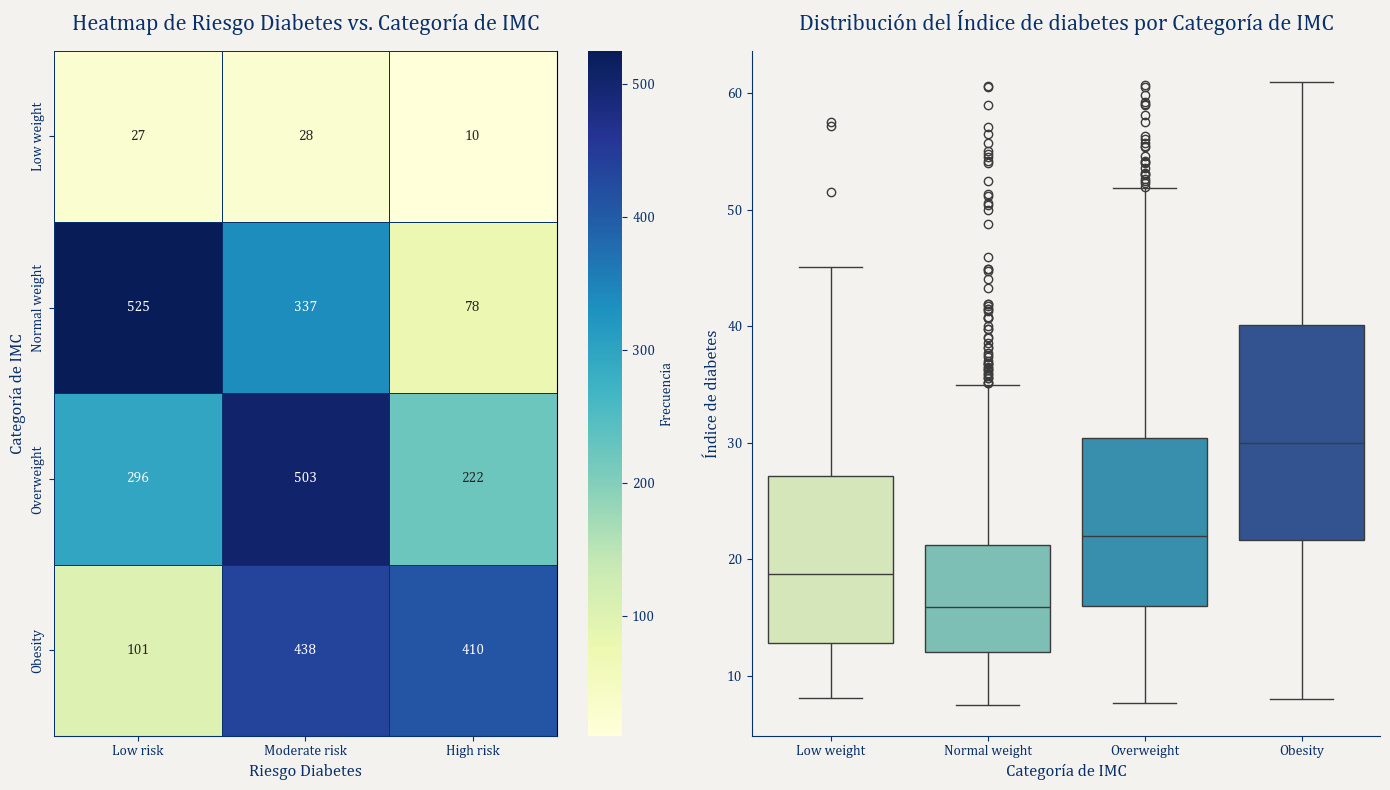

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asignar un orden específico a Diabetes_classification
order_diabetes = ['Low risk', 'Moderate risk', 'High risk']
df_diabetes['Diabetes_classification'] = pd.Categorical(df_diabetes['Diabetes_classification'], categories=order_diabetes, ordered=True)

# Asegurarse de que IMC_category tiene un orden específico
order_imc = ['Low weight', 'Normal weight', 'Overweight', 'Obesity']
df_diabetes['IMC_category'] = pd.Categorical(df_diabetes['IMC_category'], categories=order_imc, ordered=True)

# Configurar el tamaño de la figura y los subgráficos (2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 8), facecolor='#F3F2EF')

# --- Heatmap ---
ax1 = axes[0]

sns.heatmap(
    pd.crosstab(df_diabetes['IMC_category'], df_diabetes['Diabetes_classification']),
    annot=True,  # Para mostrar los valores dentro de las celdas
    cmap="YlGnBu",  # Colores azulados y verdosos
    fmt="d",  # Mostrar los valores como enteros
    linewidths=0.5,  # Líneas de separación entre celdas
    linecolor="#08306b",  # Color de las líneas
    cbar_kws={'label': 'Frecuencia'},  # Etiqueta de la barra de color
    xticklabels=True,  # Mostrar etiquetas en el eje x
    yticklabels=True,  # Mostrar etiquetas en el eje y
    ax=ax1
)

# Títulos y etiquetas del heatmap
ax1.set_title("Heatmap de Riesgo Diabetes vs. Categoría de IMC", fontsize=16, color="#08306b", pad=15)
ax1.set_xlabel("Riesgo Diabetes", fontsize=12, color="#08306b")
ax1.set_ylabel("Categoría de IMC", fontsize=12, color="#08306b")

# Estilizar los ejes
ax1.tick_params(axis='x', colors="#08306b")
ax1.tick_params(axis='y', colors="#08306b")

# Cambiar el color de las líneas de los ejes
ax1.spines['left'].set_color("#08306b")
ax1.spines['bottom'].set_color("#08306b")
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)

# Color para los ticks de la barra de color
cbar = ax1.collections[0].colorbar
cbar.set_label('Frecuencia', color='#08306b')
cbar.ax.yaxis.set_tick_params(color='#08306b')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='#08306b')

# --- Boxplot ---
ax2 = axes[1]

sns.boxplot(
    data=df_diabetes,
    x='IMC_category',
    y='Diabetes_index',
    palette="YlGnBu",  # Colores azulados y verdosos
    ax=ax2
)

# Títulos y etiquetas del boxplot
ax2.set_title("Distribución del Índice de diabetes por Categoría de IMC", fontsize=16, color="#08306b", pad=15)
ax2.set_xlabel("Categoría de IMC", fontsize=12, color="#08306b")
ax2.set_ylabel("Índice de diabetes", fontsize=12, color="#08306b")

# Estilizar los ejes
ax2.tick_params(axis='x', colors="#08306b")
ax2.tick_params(axis='y', colors="#08306b")

# Colorear los ejes con el color principal
ax2.spines['left'].set_color("#08306b")
ax2.spines['bottom'].set_color("#08306b")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Configurar el fondo interior del gráfico
ax2.set_facecolor('#F3F2EF')

# Eliminar el grid
ax2.grid(False)

# Mostrar la figura combinada
plt.tight_layout()  # Asegura un buen espaciado entre los gráficos
plt.savefig("./Figuras/diabetes_imc.png", bbox_inches="tight", dpi=300)
plt.show()


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\2802736335.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


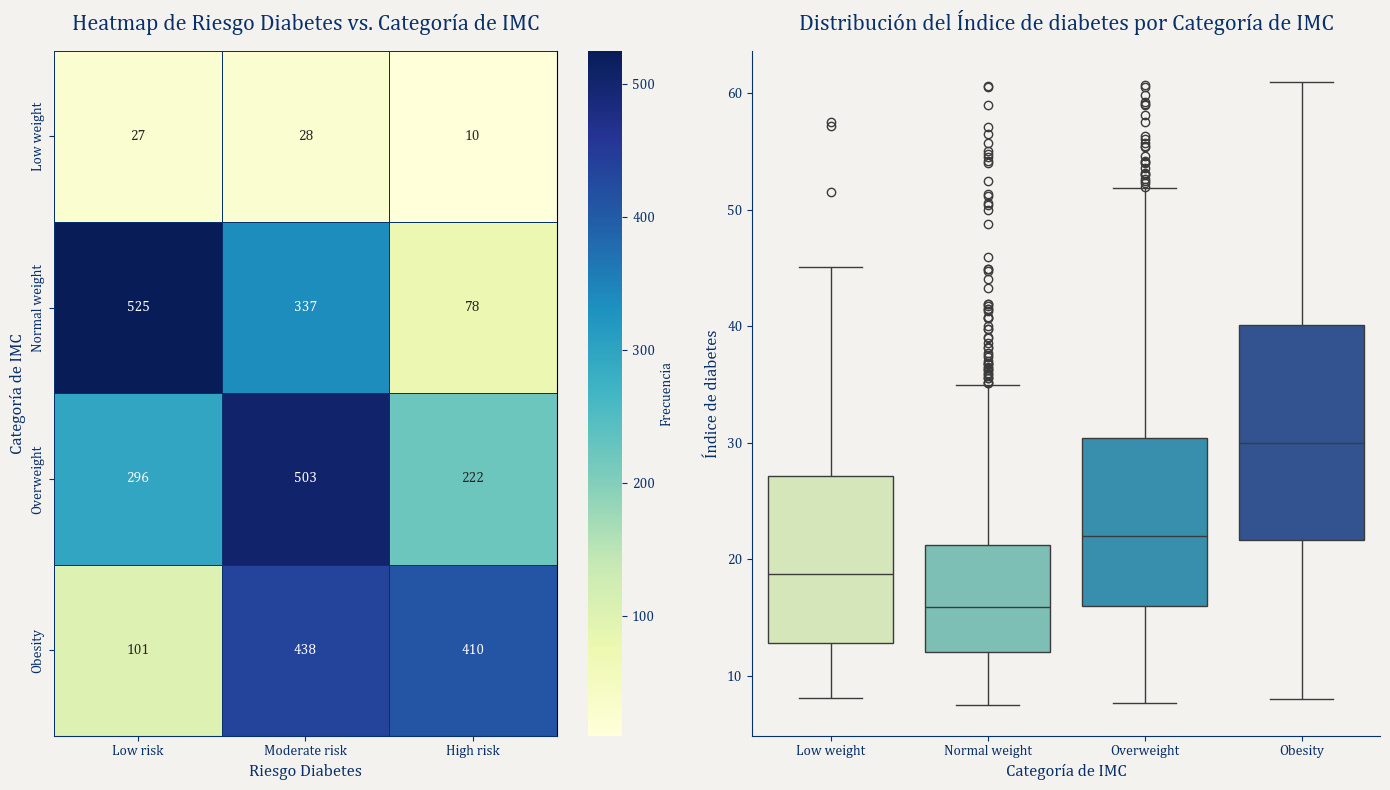

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asignar un orden específico a Diabetes_classification
order_diabetes = ['Low risk', 'Moderate risk', 'High risk']
df_diabetes['Diabetes_classification'] = pd.Categorical(df_diabetes['Diabetes_classification'], categories=order_diabetes, ordered=True)

# Asegurarse de que IMC_category tiene un orden específico
order_imc = ['Low weight', 'Normal weight', 'Overweight', 'Obesity']
df_diabetes['IMC_category'] = pd.Categorical(df_diabetes['IMC_category'], categories=order_imc, ordered=True)

# Configurar el tamaño de la figura y los subgráficos (2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 8), facecolor='#F3F2EF')

# --- Heatmap ---
ax1 = axes[0]

sns.heatmap(
    pd.crosstab(df_diabetes['IMC_category'], df_diabetes['Diabetes_classification']),
    annot=True,  # Para mostrar los valores dentro de las celdas
    cmap="YlGnBu",  # Colores azulados y verdosos
    fmt="d",  # Mostrar los valores como enteros
    linewidths=0.5,  # Líneas de separación entre celdas
    linecolor="#08306b",  # Color de las líneas
    cbar_kws={'label': 'Frecuencia'},  # Etiqueta de la barra de color
    xticklabels=True,  # Mostrar etiquetas en el eje x
    yticklabels=True,  # Mostrar etiquetas en el eje y
    ax=ax1
)

# Títulos y etiquetas del heatmap
ax1.set_title("Heatmap de Riesgo Diabetes vs. Categoría de IMC", fontsize=16, color="#08306b", pad=15)
ax1.set_xlabel("Riesgo Diabetes", fontsize=12, color="#08306b")
ax1.set_ylabel("Categoría de IMC", fontsize=12, color="#08306b")

# Estilizar los ejes
ax1.tick_params(axis='x', colors="#08306b")
ax1.tick_params(axis='y', colors="#08306b")

# Cambiar el color de las líneas de los ejes
ax1.spines['left'].set_color("#08306b")
ax1.spines['bottom'].set_color("#08306b")
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)

# Color para los ticks de la barra de color
cbar = ax1.collections[0].colorbar
cbar.set_label('Frecuencia', color='#08306b')
cbar.ax.yaxis.set_tick_params(color='#08306b')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='#08306b')

# --- Boxplot ---
ax2 = axes[1]

sns.boxplot(
    data=df_diabetes,
    x='IMC_category',
    y='Diabetes_index',
    palette="YlGnBu",  # Colores azulados y verdosos
    ax=ax2
)

# Títulos y etiquetas del boxplot
ax2.set_title("Distribución del Índice de diabetes por Categoría de IMC", fontsize=16, color="#08306b", pad=15)
ax2.set_xlabel("Categoría de IMC", fontsize=12, color="#08306b")
ax2.set_ylabel("Índice de diabetes", fontsize=12, color="#08306b")

# Estilizar los ejes
ax2.tick_params(axis='x', colors="#08306b")
ax2.tick_params(axis='y', colors="#08306b")

# Colorear los ejes con el color principal
ax2.spines['left'].set_color("#08306b")
ax2.spines['bottom'].set_color("#08306b")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Configurar el fondo interior del gráfico
ax2.set_facecolor('#F3F2EF')

# Eliminar el grid
ax2.grid(False)

# Mostrar la figura combinada
plt.tight_layout()  # Asegura un buen espaciado entre los gráficos
plt.savefig("./Figuras/diabetes_imc.png", bbox_inches="tight", dpi=300)
plt.show()


In [38]:
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df_diabetes['IMC_category'], df_diabetes['Diabetes_classification'])

# Realizar la prueba Chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados
print("Estadístico Chi-cuadrado:", chi2_stat)
print("Grados de libertad:", dof)
print("Valor p:", p_value)

# Evaluar significancia
if p_value < 0.05:
    print("Existe una asociación significativa entre el IMC y la clasificación de riesgo de diabetes.")
else:
    print("No se encontró una asociación significativa entre el IMC y la clasificación de riesgo de diabetes.")


Estadístico Chi-cuadrado: 574.2092145645215
Grados de libertad: 6
Valor p: 8.5139083676265e-121
Existe una asociación significativa entre el IMC y la clasificación de riesgo de diabetes.


In [39]:
from scipy.stats import f_oneway

# ANOVA de una vía
f_stat, p_value = f_oneway(*[df_diabetes[df_diabetes['IMC_category'] == category]['Diabetes_index']
                             for category in order_imc])
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Las diferencias en el índice de diabetes entre categorías de IMC son significativas.")
else:
    print("No se encontraron diferencias significativas en el índice de diabetes entre categorías de IMC.")


Estadístico F: 238.55316481461554
Valor p: 1.1134481523455468e-138
Las diferencias en el índice de diabetes entre categorías de IMC son significativas.


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\563327426.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\563327426.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0, 1].legend().set_visible(False)
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\563327426.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\563327426.py:77: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(
C:\Users\rodri\AppData\L

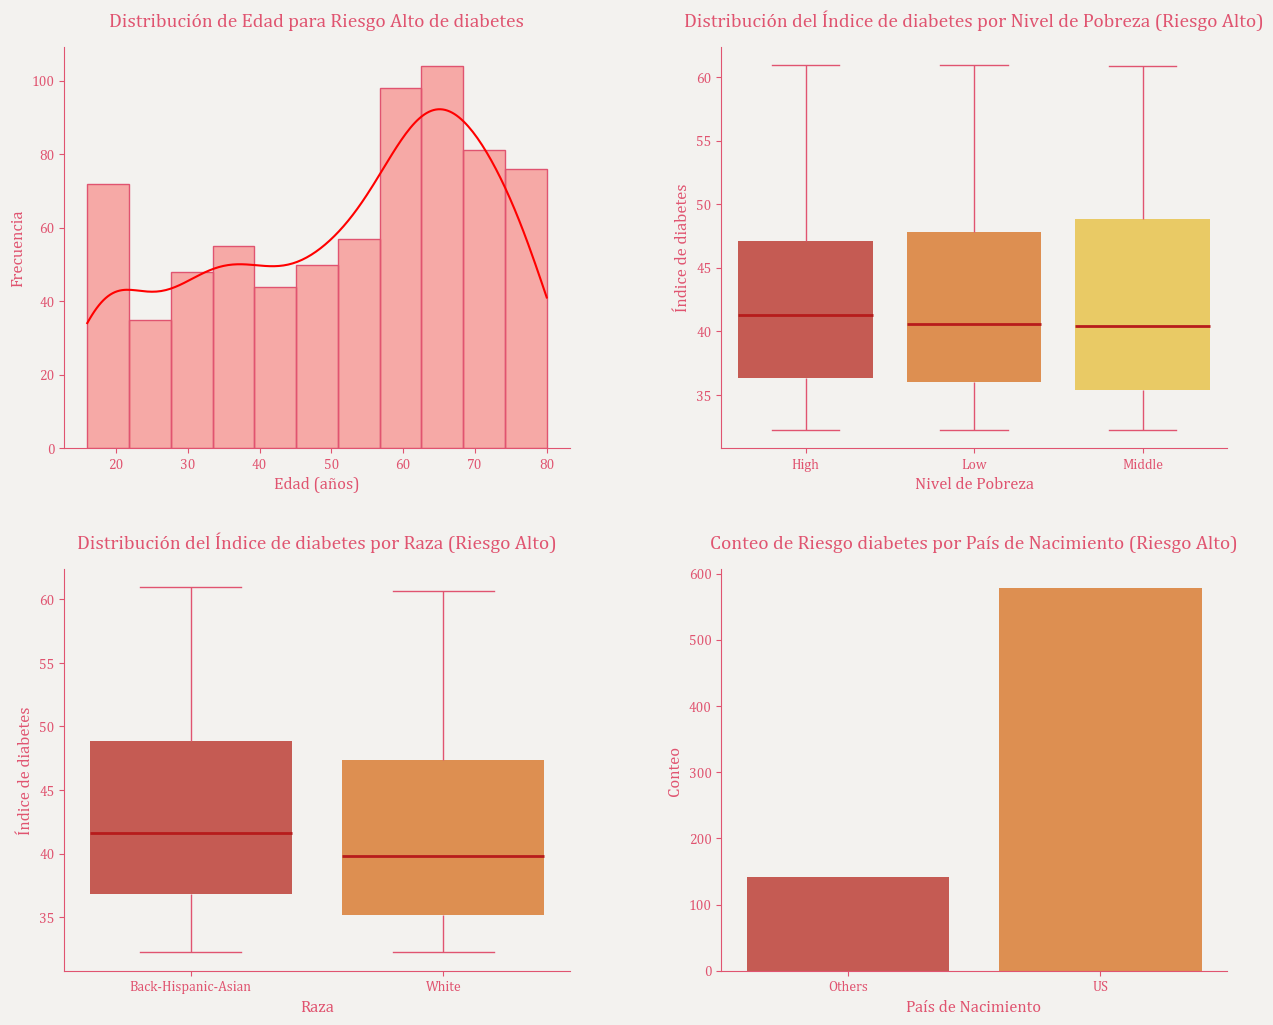

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el DataFrame para que solo tenga las filas donde Cardiovascular_risk_1 es "High"
df_high_risk = df_diabetes[df_diabetes['Diabetes_classification'] == 'High risk']

# Crear la figura y los subgráficos con tamaño adecuado para una diapositiva de PowerPoint
fig, axes = plt.subplots(2, 2, figsize=(15, 12), facecolor='#F3F2EF')

# Ajustar el espacio entre los subgráficos (menor separación entre las gráficas)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Paleta cálida más suave (rojo suave, naranja suave, amarillo suave)
soft_warm_palette = ["#D84B40", "#F48C3A", "#FFD54F"]  # Rojo suave, naranja suave y amarillo suave

# 1. Histograma de Edad (cambiar la gráfica de dispersión por este histograma)
plt.sca(axes[0, 0])  # Cambiar la referencia del gráfico al primer subgráfico
sns.histplot(
    df_high_risk['Age(year)'],
    kde=True,
    color="red",  # Color rojo
    alpha=0.3,  # Transparencia
    label="High",
    edgecolor='#E05470'  # Eliminar el contorno de las barras
)
axes[0, 0].set_title("Distribución de Edad para Riesgo Alto de diabetes", fontsize=14, color="#E05470", pad=15)
axes[0, 0].set_xlabel("Edad (años)", fontsize=12, color="#E05470")
axes[0, 0].set_ylabel("Frecuencia", fontsize=12, color="#E05470")
axes[0, 0].tick_params(axis='x', colors="#E05470")
axes[0, 0].tick_params(axis='y', colors="#E05470")
axes[0, 0].set_facecolor('#F3F2EF')  # Fondo interior de la gráfica
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['left'].set_color("#E05470")
axes[0, 0].spines['bottom'].set_color("#E05470")

# Quitar la leyenda
axes[0, 0].legend().set_visible(False)

# Quitar el grid
axes[0, 0].grid(False)

# 2. Boxplot: Cardiovascular_risk_1 vs Income_poverty
sns.boxplot(
    data=df_high_risk, 
    x='Income_poverty', 
    y='Diabetes_index',  # Cambiar el eje Y a Diabetes_index
    palette=soft_warm_palette,  # Usar la paleta cálida de colores suaves
    ax=axes[0, 1],
    boxprops=dict(edgecolor='none'),  # Quitar el contorno de la caja
    linecolor="#E05470",
    medianprops=dict(color="#B71C1C", linewidth=2),  # Color más intenso para la línea de la mediana (rojo más fuerte)
)
axes[0, 1].set_title("Distribución del Índice de diabetes por Nivel de Pobreza (Riesgo Alto)", fontsize=14, color="#E05470", pad=15)
axes[0, 1].set_xlabel("Nivel de Pobreza", fontsize=12, color="#E05470")
axes[0, 1].set_ylabel("Índice de diabetes", fontsize=12, color="#E05470")
axes[0, 1].tick_params(axis='x', colors="#E05470")
axes[0, 1].tick_params(axis='y', colors="#E05470")
axes[0, 1].set_facecolor('#F3F2EF')  # Fondo interior de la gráfica

# Eliminar los ejes superior y derecho
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)

# Cambiar el color de los bordes de los ejes
axes[0, 1].spines['left'].set_color("#E05470")
axes[0, 1].spines['bottom'].set_color("#E05470")

# Quitar la leyenda
axes[0, 1].legend().set_visible(False)

# Quitar el grid
axes[0, 1].grid(False)

# 3. Boxplot: Cardiovascular_risk_1 vs Raza (cambiamos el eje Y a Diabetes_index)
sns.boxplot(
    data=df_high_risk, 
    x='Races_simplify', 
    y='Diabetes_index',  # Cambiar el eje Y a Diabetes_index
    palette=soft_warm_palette,  # Usar la paleta cálida de colores suaves
    ax=axes[1, 0],
    linecolor="#E05470",
    boxprops=dict(edgecolor='none'),  # Quitar el contorno de la caja
    medianprops=dict(color="#B71C1C", linewidth=2),  # Color más intenso para la línea de la mediana (rojo más fuerte)
)
axes[1, 0].set_title("Distribución del Índice de diabetes por Raza (Riesgo Alto)", fontsize=14, color="#E05470", pad=15)
axes[1, 0].set_xlabel("Raza", fontsize=12, color="#E05470")
axes[1, 0].set_ylabel("Índice de diabetes", fontsize=12, color="#E05470")
axes[1, 0].tick_params(axis='x', colors="#E05470")
axes[1, 0].tick_params(axis='y', colors="#E05470")
axes[1, 0].set_facecolor('#F3F2EF')  # Fondo interior de la gráfica

# Eliminar los ejes superior y derecho
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)

# Cambiar el color de los bordes de los ejes
axes[1, 0].spines['left'].set_color("#E05470")
axes[1, 0].spines['bottom'].set_color("#E05470")

# Quitar la leyenda
axes[1, 0].legend().set_visible(False)

# Quitar el grid
axes[1, 0].grid(False)

# 4. Countplot: Cardiovascular_risk_1 vs País de Nacimiento
sns.countplot(
    data=df_high_risk, 
    x='Country_of_birth', 
    hue='Country_of_birth',  # Cambiar el 'hue' a "Country_of_birth"
    palette=soft_warm_palette,  # Usar la paleta cálida de colores suaves
    ax=axes[1, 1]
)
axes[1, 1].set_title("Conteo de Riesgo diabetes por País de Nacimiento (Riesgo Alto)", fontsize=14, color="#E05470", pad=15)
axes[1, 1].set_xlabel("País de Nacimiento", fontsize=12, color="#E05470")
axes[1, 1].set_ylabel("Conteo", fontsize=12, color="#E05470")
axes[1, 1].tick_params(axis='x', colors="#E05470")
axes[1, 1].tick_params(axis='y', colors="#E05470")
axes[1, 1].set_facecolor('#F3F2EF')  # Fondo interior de la gráfica

# Eliminar los ejes superior y derecho
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)

# Cambiar el color de los bordes de los ejes
axes[1, 1].spines['left'].set_color("#E05470")
axes[1, 1].spines['bottom'].set_color("#E05470")

# Quitar la leyenda
axes[1, 1].legend().set_visible(False)

# Quitar el grid
axes[1, 1].grid(False)

# Mostrar la figura
plt.savefig("./Figuras/diabetes_demographic.png", bbox_inches="tight", dpi=300)

plt.show()



In [41]:
from scipy.stats import f_oneway, kruskal

# Agrupar los datos por nivel de pobreza
groups_income = [group['Diabetes_index'].dropna().values 
                 for _, group in df_high_risk.groupby('Income_poverty')]

# Verificar si hay suficientes datos
if all(len(g) > 1 for g in groups_income):  
    # ANOVA
    stat_anova, p_anova = f_oneway(*groups_income)
    print(f"ANOVA: Estadístico={stat_anova:.4f}, p-valor={p_anova:.4f}")
    if p_anova < 0.05:
        print("Existen diferencias significativas entre los niveles de pobreza.")
    else:
        print("No hay diferencias significativas entre los niveles de pobreza.")
else:
    print("No hay suficientes datos para realizar el ANOVA.")


ANOVA: Estadístico=0.0019, p-valor=0.9982
No hay diferencias significativas entre los niveles de pobreza.


In [42]:
# Agrupar los datos por raza
groups_race = [group['Diabetes_index'].dropna().values 
               for _, group in df_high_risk.groupby('Races_simplify')]

# Verificar si hay suficientes datos
if all(len(g) > 1 for g in groups_race):  
    # Kruskal-Wallis
    stat_kruskal, p_kruskal = kruskal(*groups_race)
    print(f"Kruskal-Wallis: Estadístico={stat_kruskal:.4f}, p-valor={p_kruskal:.4f}")
    if p_kruskal < 0.05:
        print("Existen diferencias significativas entre las razas.")
    else:
        print("No hay diferencias significativas entre las razas.")
else:
    print("No hay suficientes datos para realizar la prueba de Kruskal-Wallis.")


Kruskal-Wallis: Estadístico=9.8655, p-valor=0.0017
Existen diferencias significativas entre las razas.


In [43]:
from statsmodels.stats.proportion import proportions_ztest

# Contar las frecuencias de cada género
gender_counts = df_high_risk['Country_of_birth'].value_counts()

# Número total de observaciones
total = gender_counts.sum()

# Número de hombres y mujeres
male_count = gender_counts.get('US', 0)
female_count = gender_counts.get('Others', 0)

# Realizar la prueba de Z para proporciones (comparando la proporción de hombres contra una proporción teórica de 50%)
successes = [male_count, female_count]
n = [total, total]  # El total es el mismo para ambos grupos
stat, p_value = proportions_ztest(successes, n, value=0.5)

# Mostrar resultados
print(f"Estadístico Z: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("La proporción de hombres en el grupo de alto riesgo cardiovascular difiere significativamente del 50%.")
else:
    print("No hay diferencias significativas en la proporción de hombres en el grupo de alto riesgo cardiovascular.")



Estadístico Z: 4.0056
p-valor: 0.0001
La proporción de hombres en el grupo de alto riesgo cardiovascular difiere significativamente del 50%.


In [44]:
# Crear un nuevo DataFrame con proporciones relativas
df_rel = (
    df_diabetes
    .groupby(["Gender", "Diabetes_classification"])
    .size()
    .reset_index(name='count')
)

# Calcular proporciones dentro de cada grupo de "Income_poverty"
df_rel['proportion'] = df_rel.groupby('Gender')['count'].transform(lambda x: x / x.sum())
df_rel


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\2960402837.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Gender", "Diabetes_classification"])


,Gender,Diabetes_classification,count,proportion
0,Female,Low risk,543,0.328494
1,Female,Moderate risk,754,0.456140
2,Female,High risk,356,0.215366
3,Male,Low risk,406,0.307110
4,Male,Moderate risk,552,0.417549
5,Male,High risk,364,0.275340


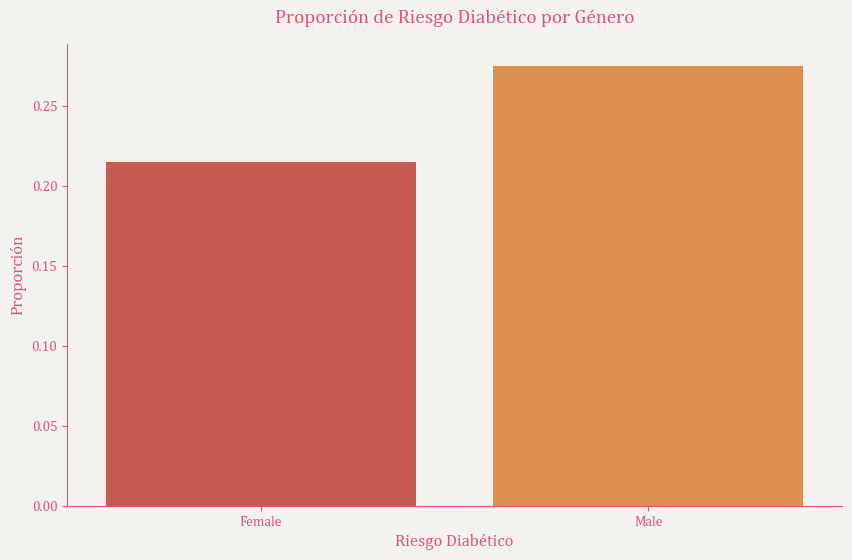

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los datos de riesgo alto
df_high = df_rel[df_rel['Diabetes_classification'] == 'High risk']

# Crear el gráfico de barras con el filtro para "High"
plt.figure(figsize=(10, 6),facecolor='#F3F2EF')
sns.barplot(
    data=df_high,
    x="Gender",
    y="proportion",
    hue="Gender",
    palette=["#D84B40", "#F48C3A"]  # Colores cálidos suaves (rojo y naranja)
)

# Títulos y etiquetas con el mismo estilo de colores
plt.title("Proporción de Riesgo Diabético por Género", fontsize=14, color="#E05470", pad=15)
plt.xlabel("Riesgo Diabético", fontsize=12, color="#E05470")
plt.ylabel("Proporción", fontsize=12, color="#E05470")

# Configuración de los ejes con el mismo color y sin bordes de arriba y derecha
plt.gca().tick_params(axis='x', colors="#E05470")
plt.gca().tick_params(axis='y', colors="#E05470")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color("#E05470")
plt.gca().spines['bottom'].set_color("#E05470")
plt.gca().set_facecolor('#F3F2EF')  # Fondo interior de la gráfica
plt.grid(False)

# Establecer el fondo interior del gráfico
plt.gca().set_facecolor('#F3F2EF')

plt.savefig("./Figuras/gender_diabetes.png", bbox_inches="tight", dpi=300)

# Mostrar el gráfico
plt.show()


In [46]:
from statsmodels.stats.proportion import proportions_ztest

# Contar las frecuencias de cada género
gender_counts = df_high_risk['Gender'].value_counts()

# Número total de observaciones
total = gender_counts.sum()

# Número de hombres y mujeres
male_count = gender_counts.get('Male', 0)
female_count = gender_counts.get('Female', 0)

# Realizar la prueba de Z para proporciones (comparando la proporción de hombres contra una proporción teórica de 50%)
successes = [male_count, female_count]
n = [total, total]  # El total es el mismo para ambos grupos
stat, p_value = proportions_ztest(successes, n, value=0.5)

# Mostrar resultados
print(f"Estadístico Z: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("La proporción de hombres en el grupo de alto riesgo cardiovascular difiere significativamente del 50%.")
else:
    print("No hay diferencias significativas en la proporción de hombres en el grupo de alto riesgo cardiovascular.")



Estadístico Z: -18.5520
p-valor: 0.0000
La proporción de hombres en el grupo de alto riesgo cardiovascular difiere significativamente del 50%.


In [47]:
tabla_contingencia = pd.crosstab(df_diabetes['Diabetes_classification'], df_diabetes['IMC_category'])

tabla_contingencia

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

print("                        ")
contrib = (tabla_contingencia - expected) ** 2 / expected
print(contrib)

Valor Chi-Cuadrado: 574.2092145645213
P-Value: 8.513908367627473e-121
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[ 20.73445378 299.85210084 325.69042017 302.72302521]
 [ 28.53445378 412.65210084 448.21042017 416.60302521]
 [ 15.73109244 227.49579832 247.09915966 229.67394958]]
                        
IMC_category             Low weight  Normal weight  Overweight     Obesity
Diabetes_classification                                                   
Low risk                   1.893325     169.055265    2.706623  134.420495
Moderate risk              0.010010      13.869408    6.697520    1.098961
High risk                  2.087930      98.239149    2.549453  141.581074


In [48]:
df_inflamatory = pd.read_csv("./data/Data_processed/df_inflamatory_pob_clean.csv")
df_inflamatory.columns
# Asignar valores numéricos a las categorías de riesgo cardiovascular

df_inflamatory['Inflamatory_risk']


0       Moderate risk
1           High risk
2       Moderate risk
3           High risk
4            Low risk
            ...      
1436        High risk
1437    Moderate risk
1438        High risk
1439         Low risk
1440    Moderate risk
Name: Inflamatory_risk, Length: 1441, dtype: object

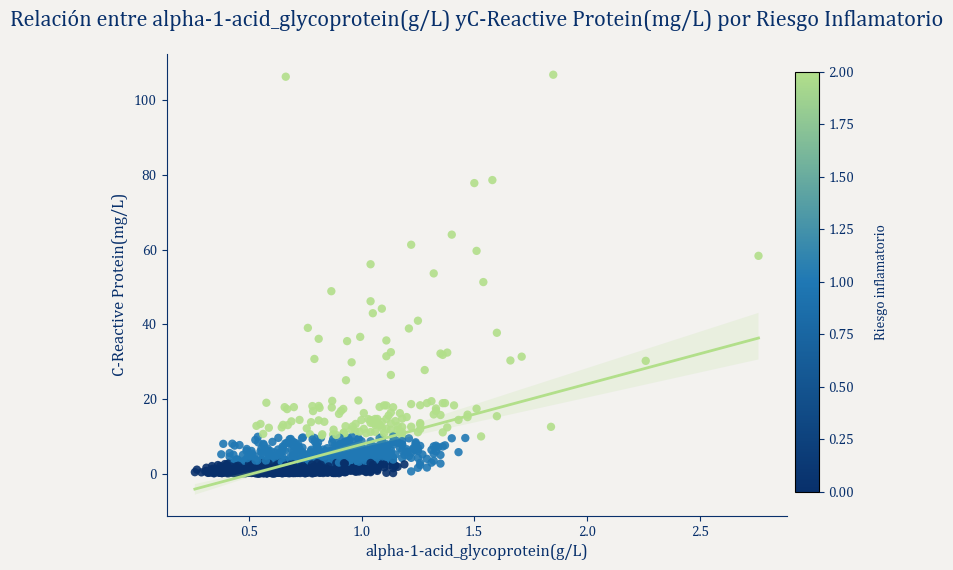

In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors


# Crear una paleta personalizada más oscura basada en YlGnBu
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_YlGnBu", ["#08306b", "#1f78b4", "#b2df8a"], N=256
)
risk_mapping = {'Low risk': 0, 'Moderate risk': 1, 'High risk': 2}
df_inflamatory['Inflamatory_risk_numeric'] = df_inflamatory['Inflamatory_risk'].map(risk_mapping)

# Obtener el color del valor máximo
norm = mpl.colors.Normalize(vmin=df_inflamatory['Inflamatory_risk_numeric'].min(), 
                            vmax=df_inflamatory['Inflamatory_risk_numeric'].max())
max_color = custom_cmap(norm(df_inflamatory['Inflamatory_risk_numeric'].max()))

# Color para todos los elementos textuales y ejes
main_color = "#08306b"

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6), facecolor = '#F3F2EF')

# Crear el scatterplot sin borde en los puntos
scatter = sns.scatterplot(
    x='alpha-1-acid_glycoprotein(g/L)', 
    y='C-Reactive Protein(mg/L)', 
    data=df_inflamatory, 
    hue='Inflamatory_risk_numeric',  # Usar la columna numérica para la barra de color
    palette=custom_cmap,  # Paleta personalizada,  # Tamaño de los puntos
    edgecolor='none',  # Eliminar el borde de los puntos
    alpha=0.9,  # Aumentar la opacidad
    ax=ax,  
    legend=False  # Eliminar la leyenda de los puntos
)

# Añadir la línea de tendencia (regresión) con el color del valor máximo
sns.regplot(
    x='alpha-1-acid_glycoprotein(g/L)', 
    y='C-Reactive Protein(mg/L)', 
    data=df_inflamatory, 
    scatter=False,  # No mostrar los puntos de nuevo
    line_kws={'color': max_color, 'lw': 2},  # Usar el color máximo de la paleta
    ax=ax
)

# Títulos y etiquetas
ax.set_title('Relación entre alpha-1-acid_glycoprotein(g/L) yC-Reactive Protein(mg/L) por Riesgo Inflamatorio', fontsize=16, color=main_color,
             pad=20)
ax.set_xlabel('alpha-1-acid_glycoprotein(g/L)', fontsize=12, color=main_color)
ax.set_ylabel('C-Reactive Protein(mg/L)', fontsize=12, color=main_color)

# Estilizar los ejes y asignar color
ax.tick_params(axis='x', colors=main_color)
ax.tick_params(axis='y', colors=main_color)

# Colorear los ejes con el color principal
ax.spines['left'].set_color(main_color)
ax.spines['bottom'].set_color(main_color)

# Eliminar los bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_facecolor('#F3F2EF')

# Eliminar el grid
ax.grid(False)

# Crear la barra de color con normalización ajustada
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Necesario para que la barra de color funcione correctamente

# Crear una posición para la barra de color
cax = fig.add_axes([0.91, 0.15, 0.03, 0.7])  # Ajusta la posición de la barra de color

# Añadir la barra de color y personalizar su color
cbar = fig.colorbar(sm, cax=cax, label="Riesgo inflamatorio", orientation="vertical")
cbar.ax.yaxis.set_tick_params(color=main_color)  # Color de las marcas de la barra
plt.setp(cbar.ax.yaxis.get_ticklabels(), color=main_color)  # Color del texto de la barra
cbar.set_label("Riesgo inflamatorio", color=main_color,labelpad=15)  # Color del texto de la etiqueta

plt.savefig("./Figuras/inflamatory.png", bbox_inches="tight", dpi=300)


# Mostrar el gráfico
plt.show()

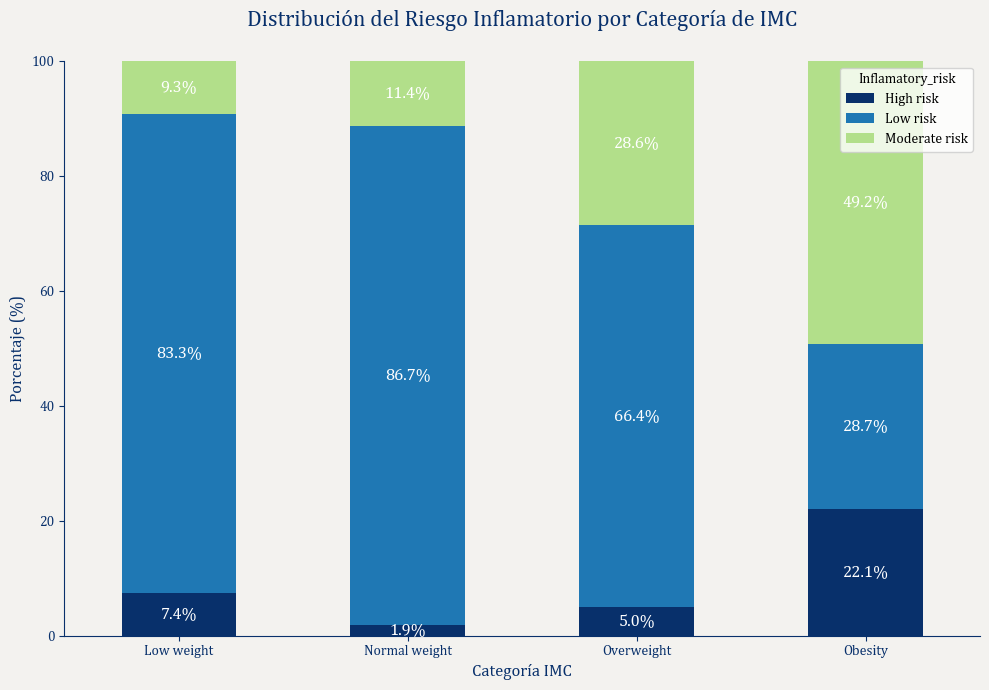

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos para contar las combinaciones de las categorías
data_grouped = df_inflamatory.groupby(['IMC_category', 'Inflamatory_risk']).size().reset_index(name='count')

# Reorganizar el DataFrame para que 'Inflamatory_risk' sea la variable que se apile
data_pivot = data_grouped.pivot(index='IMC_category', columns='Inflamatory_risk', values='count').fillna(0)

# Asegurar que IMC_category sigue el orden deseado
order_imc = ['Low weight', 'Normal weight', 'Overweight', 'Obesity']
data_pivot = data_pivot.reindex(order_imc)

# Calcular el total de pacientes por categoría de IMC (por cada categoría de IMC)
total_imc = data_pivot.sum(axis=1)

# Calcular los porcentajes dentro de cada categoría de IMC (porcentaje de cada `Inflamatory_risk` dentro de cada `IMC_category`)
data_percent = data_pivot.div(total_imc, axis=0) * 100

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 7), facecolor='#F3F2EF')

# Crear el gráfico de barras apiladas
bars = data_percent.plot(kind='bar', stacked=True, color=['#08306b', '#1f78b4', '#b2df8a'], ax=ax)

# Estilizar el gráfico
ax.set_title('Distribución del Riesgo Inflamatorio por Categoría de IMC', fontsize=16, color='#08306b', pad=25)
ax.set_xlabel('Categoría IMC', fontsize=12, color='#08306b')
ax.set_ylabel('Porcentaje (%)', fontsize=12, color='#08306b')

# Estilizar los ejes
ax.tick_params(axis='x', colors='#08306b', rotation=0)  # Rotar las etiquetas a horizontal
ax.tick_params(axis='y', colors='#08306b')

# Colorear los bordes de las barras
ax.spines['left'].set_color('#08306b')
ax.spines['bottom'].set_color('#08306b')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Configurar el fondo del gráfico
ax.set_facecolor('#F3F2EF')

# Ajustar el límite del eje Y para que vaya de 0 a 100
ax.set_ylim(0, 100)

# Eliminar el grid
plt.grid(False)

# Añadir los porcentajes dentro de cada barra apilada
for p in ax.patches:
    # Calculamos el porcentaje en cada barra
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()

    # Si la barra tiene un valor, colocamos el porcentaje en el centro de la barra
    if height > 0:
        percentage = f'{height:.1f}%'
        ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center', color='white', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.savefig("./Figuras/inflamatory_imc_percentage_with_labels.png", bbox_inches="tight", dpi=300)
plt.show()


In [51]:
df_inflamatory.columns

Index(['SEQN', 'alpha-1-acid_glycoprotein(g/L)', 'C-Reactive Protein(mg/L)',
       'Height(m)', 'Weight(Kg)', 'Weight(year_ago)', 'Try_to_loss_weight',
       'IMC', 'IMC_category', 'Gender', 'Age(year)', 'Race', 'Served_army',
       'Country_of_birth', 'Length_time_US', 'Education(adults)',
       'Marital_status', 'Pregnancy_status', 'People_in_Household',
       'Income_poverty_num', 'Income_poverty', 'Races_simplify',
       'Inflamatory_risk', 'Inflamatory_risk_numeric'],
      dtype='object')

C:\Users\rodri\AppData\Local\Temp\ipykernel_172\445208520.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0, 0].legend().set_visible(False)
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\445208520.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\445208520.py:72: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\445208520.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1, 1].legend().set_visible(False)


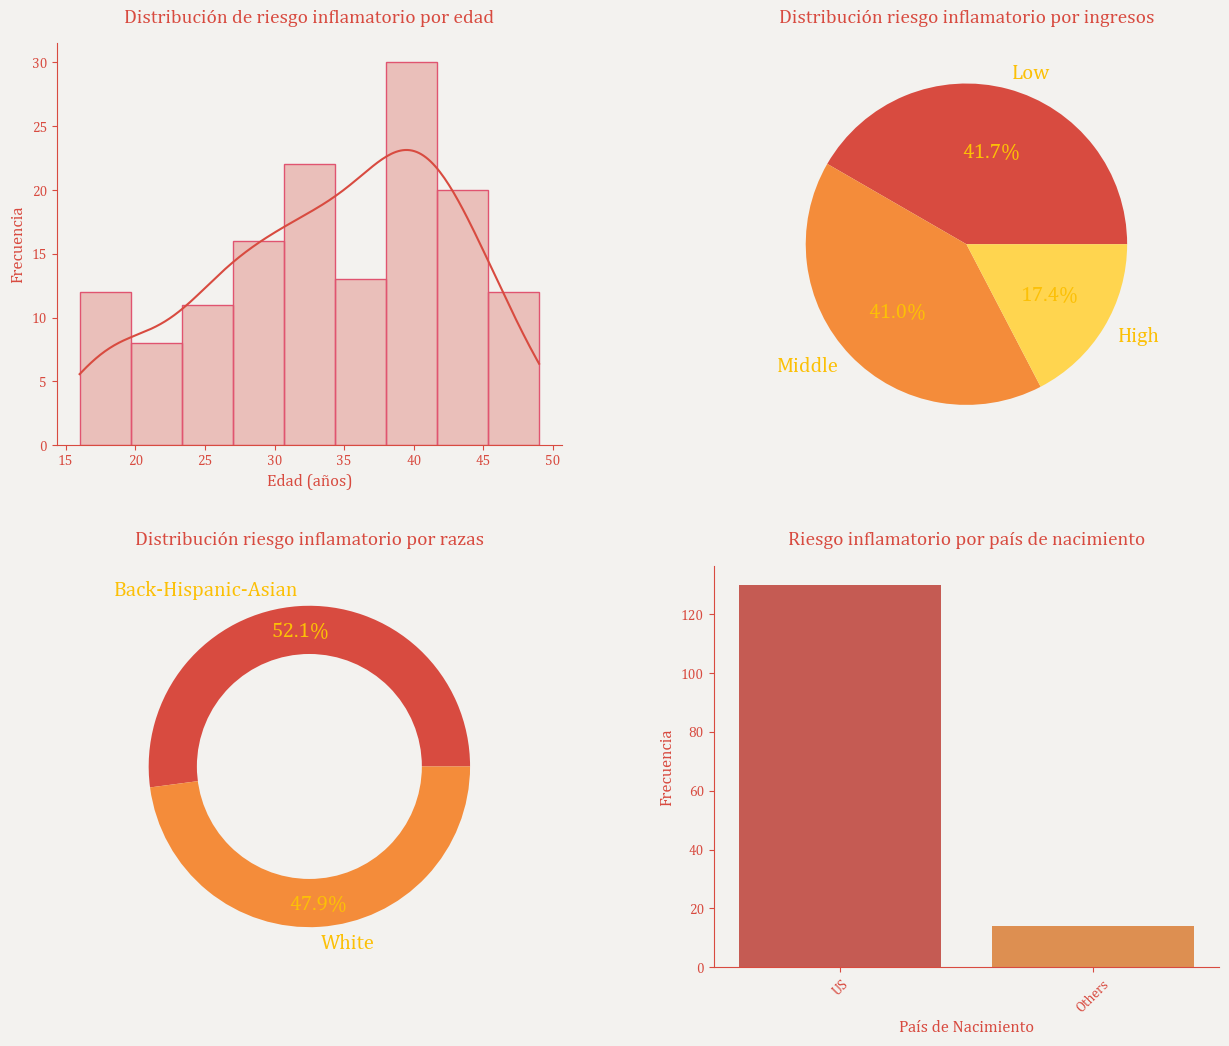

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el DataFrame para que solo tenga las filas donde Inflamatory_risk es "High"
df_high_risk = df_inflamatory[df_inflamatory['Inflamatory_risk'] == 'High risk']

# Crear la figura y los subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12), facecolor='#F3F2EF')

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Paleta cálida más suave
soft_warm_palette = ["#D84B40", "#F48C3A", "#FFD54F"]

# 1. Histograma de Edad
plt.sca(axes[0, 0])
sns.histplot(
    df_high_risk['Age(year)'],
    kde=True,
    color="#D84B40",
    edgecolor='#E05470',
    alpha=0.3
)
axes[0, 0].set_title("Distribución de riesgo inflamatorio por edad", fontsize=14, color="#D84B40", pad=15)
axes[0, 0].set_xlabel("Edad (años)", fontsize=12, color="#D84B40")
axes[0, 0].set_ylabel("Frecuencia", fontsize=12, color="#D84B40")
axes[0, 0].tick_params(axis='x', colors="#D84B40")
axes[0, 0].tick_params(axis='y', colors="#D84B40")
axes[0, 0].set_facecolor('#F3F2EF')
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['left'].set_color("#D84B40")
axes[0, 0].spines['bottom'].set_color("#D84B40")
axes[0, 0].legend().set_visible(False)
axes[0, 0].grid(False)

# 2. Pie Chart: Income_poverty
income_counts = df_high_risk['Income_poverty'].value_counts()
axes[0, 1].pie(
    income_counts,
    labels=income_counts.index,
    colors=soft_warm_palette,
    autopct='%1.1f%%',
    textprops={'color': '#fcc006', 'fontsize': 15}
)
axes[0, 1].set_title("Distribución riesgo inflamatorio por ingresos", fontsize=14, color="#D84B40", pad=15)

# 3. Donut Chart: Races_simplify con etiquetas fuera del gráfico
races_counts = df_high_risk['Races_simplify'].value_counts()

# Crear el gráfico
wedges, texts, autotexts = axes[1, 0].pie(
    races_counts,
    labels=races_counts.index,  # Mostrar etiquetas fuera
    colors=soft_warm_palette,
    autopct='%1.1f%%',  # Mostrar porcentajes
    pctdistance=0.85,  # Porcentaje más cerca del centro
    labeldistance=1.1,  # Posición de las etiquetas fuera del donut
    textprops={'fontsize': 15, 'color': '#fcc006'}
)

# Agregar círculo central para el donut
centre_circle = plt.Circle((0, 0), 0.70, fc='#F3F2EF')
axes[1, 0].add_artist(centre_circle)

# Título
axes[1, 0].set_title("Distribución riesgo inflamatorio por razas", fontsize=14, color="#D84B40", pad=15)

# 4. Countplot: País de Nacimiento
sns.countplot(
    data=df_high_risk,
    x='Country_of_birth',
    palette=soft_warm_palette,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Riesgo inflamatorio por país de nacimiento", fontsize=14, color="#D84B40", pad=15)
axes[1, 1].set_xlabel("País de Nacimiento", fontsize=12, color="#D84B40")
axes[1, 1].set_ylabel("Frecuencia", fontsize=12, color="#D84B40")
axes[1, 1].tick_params(axis='x', colors="#D84B40", rotation=45)
axes[1, 1].tick_params(axis='y', colors="#D84B40")
axes[1, 1].set_facecolor('#F3F2EF')
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['left'].set_color("#D84B40")
axes[1, 1].spines['bottom'].set_color("#D84B40")
axes[1, 1].legend().set_visible(False)
axes[1, 1].grid(False)

# Guardar y mostrar la figura
plt.savefig("./Figuras/inflamatory_demographic.png", bbox_inches="tight", dpi=300)
plt.show()


In [53]:
from scipy.stats import chisquare

# Contar las frecuencias observadas
observed_frequencies = income_counts.values

# Frecuencias esperadas (uniforme o según hipótesis)
expected_frequencies = [len(df_high_risk) / len(income_counts)] * len(income_counts)

# Prueba de chi-cuadrado
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)
print(f"Chi-Square Test: Statistic={chi2_stat}, p-value={p_value}")

Chi-Square Test: Statistic=16.541666666666668, p-value=0.0002558719757415599


In [65]:
# Contar las frecuencias observadas
race_observed = races_counts.values

# Frecuencias esperadas (uniforme o según hipótesis)
race_expected = [len(df_high_risk) / len(races_counts)] * len(races_counts)

# Prueba de chi-cuadrado
chi2_stat, p_value = chisquare(f_obs=race_observed, f_exp=race_expected)
print(f"Chi-Square Test for Races: Statistic={chi2_stat}, p-value={p_value}")




Chi-Square Test for Races: Statistic=0.25, p-value=0.6170750774519739


In [71]:
from scipy.stats import binomtest, norm

# Definir parámetros
successes = 130  # Éxitos (nacidos en EE.UU. con alto riesgo)
n = 144  # Total de observaciones
p_null = 0.5  # Proporción esperada bajo la hipótesis nula

# Calcular proporción observada
p_observed = successes / n

# Calcular estadístico Z
z_statistic = (p_observed - p_null) / ( (p_null * (1 - p_null)) / n ) ** 0.5

# Calcular valor p basado en Z
p_value_z = 2 * (1 - norm.cdf(abs(z_statistic)))  # Test bilateral

# Resultado del test binomial
result = binomtest(successes, n, p=p_null, alternative='two-sided')

# Imprimir resultados
print(f"Test Binomial:")
print(f"- Éxitos observados: {successes}")
print(f"- Total de observaciones: {n}")
print(f"- Proporción esperada (bajo H0): {p_null}")
print(f"- Proporción observada: {p_observed:.5f}")
print(f"- Estadístico Z: {z_statistic:.5f}")
print(f"- Valor p basado en Z: {p_value_z:.5e}")
print(f"- Valor p (exacto, test binomial): {result.pvalue:.5e}")

# Determinar si el resultado es significativo
alpha = 0.05
if p_value_z < alpha:
    print("El resultado basado en Z es significativo (rechazamos la hipótesis nula).")
else:
    print("El resultado basado en Z no es significativo (no rechazamos la hipótesis nula).")



Test Binomial:
- Éxitos observados: 130
- Total de observaciones: 144
- Proporción esperada (bajo H0): 0.5
- Proporción observada: 0.90278
- Estadístico Z: 9.66667
- Valor p basado en Z: 0.00000e+00
- Valor p (exacto, test binomial): 9.87492e-25
El resultado basado en Z es significativo (rechazamos la hipótesis nula).


In [68]:
print(contingency_table)

Inflamatory_risk  High risk
Country_of_birth           
Others                   14
US                      130


In [54]:
df_smoking = pd.read_csv("./data/Data_processed/df_smoking_pob_clean.csv")
df_smoking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6615 entries, 0 to 6614
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       6615 non-null   float64
 1   100_cigarettes_life        6335 non-null   object 
 2   now_smoke_cigarettes?      2518 non-null   object 
 3   cigarettes_past_30_days    919 non-null    object 
 4   tobacco_5_days             5750 non-null   object 
 5   cigarettes_smoked_per_day  786 non-null    object 
 6   last_cigarette             782 non-null    object 
 7   tobacco_product_5_days?    5735 non-null   object 
 8   Height(m)                  6615 non-null   float64
 9   Weight(Kg)                 6615 non-null   float64
 10  Weight(year_ago)           6615 non-null   float64
 11  Try_to_loss_weight         6615 non-null   float64
 12  IMC                        6615 non-null   float64
 13  IMC_category               6615 non-null   objec

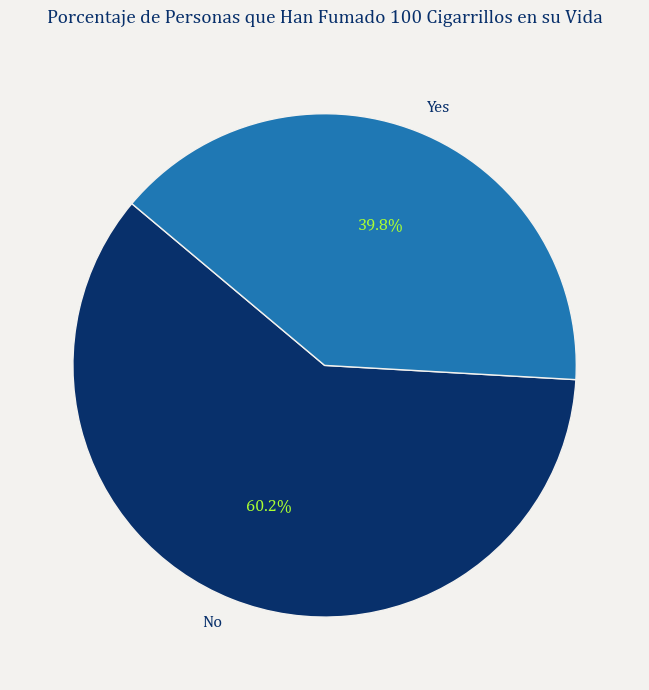

In [55]:
# Eliminar filas donde 100_cigarettes_life es "Don't know" o "Refuse"
filtered_df = df_smoking.drop(df_smoking[df_smoking['100_cigarettes_life'].isin(["Dont know", "Refused"])].index)

# Contar los valores de la variable filtrada
smoking_counts = filtered_df['100_cigarettes_life'].value_counts()

# Crear figura
fig, ax = plt.subplots(figsize=(7, 7), facecolor='#F3F2EF')

# Colores cálidos suaves para las categorías "Yes" y "No"
soft_warm_palette = ['#08306b', '#1f78b4']  # Azul oscuro y azul medio para mayor contraste

# Crear el pie chart
wedges, texts, autotexts = ax.pie(
    smoking_counts,
    labels=smoking_counts.index,  # Mostrar "Yes" y "No" como etiquetas
    colors=soft_warm_palette,  # Aplicar la paleta de colores
    autopct='%1.1f%%',  # Mostrar porcentajes dentro del gráfico
    startangle=140,  # Rotar el inicio del gráfico
    textprops={'fontsize': 12, 'color': '#08306b'},  # Color de las etiquetas: azul oscuro
    wedgeprops={'edgecolor': '#F3F2EF'}  # Bordes blancos para mejor separación
)

# Cambiar el color de los porcentajes dentro del gráfico
for autotext in autotexts:
    autotext.set_color('#aaff32')  # Color verde fluorescente para los porcentajes

# Título estilizado
ax.set_title(
    "Porcentaje de Personas que Han Fumado 100 Cigarrillos en su Vida",
    fontsize=14,
    color="#08306b",  # Azul oscuro para el título
    pad=20
)

# Ajustar el layout para mejor apariencia
plt.tight_layout()

# Guardar el gráfico (opcional)
plt.savefig("./Figuras/smoking_100_cigarettes_life.png", bbox_inches="tight", dpi=300)

# Mostrar la figura
plt.show()


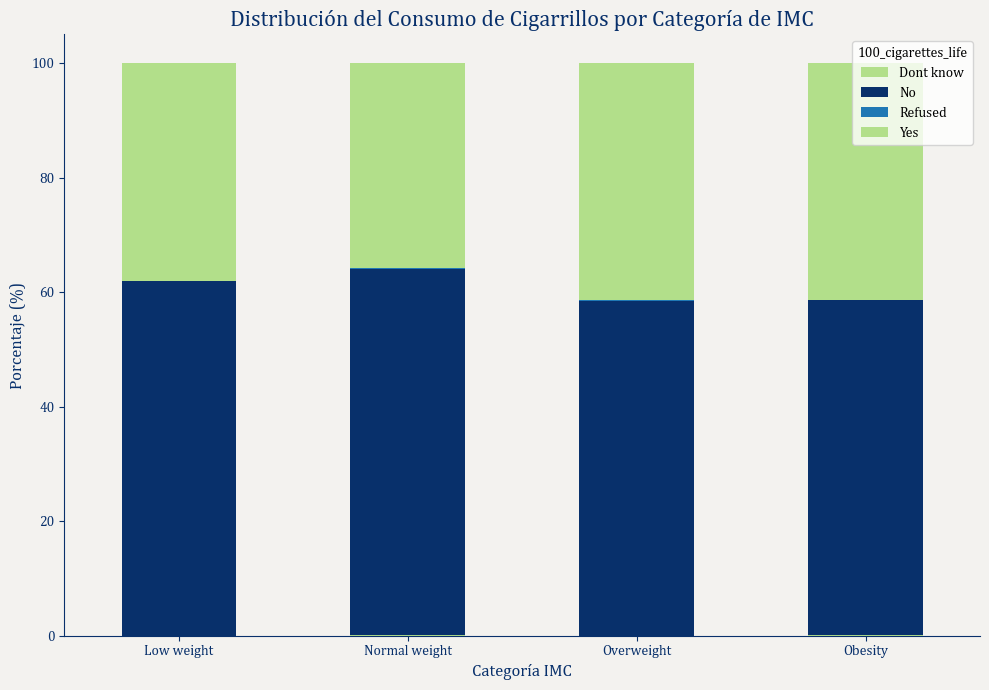

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos para contar las combinaciones de las categorías
data_grouped = df_smoking.groupby(['IMC_category', '100_cigarettes_life']).size().reset_index(name='count')

# Reorganizar el DataFrame para que '100_cigarettes_life' sea la variable que se apile
data_pivot = data_grouped.pivot(index='IMC_category', columns='100_cigarettes_life', values='count').fillna(0)

# Asegurar que IMC_category sigue el orden deseado
order_imc = ['Low weight', 'Normal weight', 'Overweight', 'Obesity']
data_pivot = data_pivot.reindex(order_imc)

# Calcular los porcentajes para cada barra
data_percent = data_pivot.div(data_pivot.sum(axis=1), axis=0) * 100

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 7), facecolor='#F3F2EF')

# Crear el gráfico de barras apiladas
data_percent.plot(kind='bar', stacked=True, color=['#b2df8a', '#08306b', '#1f78b4'], ax=ax)

# Estilizar el gráfico
ax.set_title('Distribución del Consumo de Cigarrillos por Categoría de IMC', fontsize=16, color='#08306b')
ax.set_xlabel('Categoría IMC', fontsize=12, color='#08306b')
ax.set_ylabel('Porcentaje (%)', fontsize=12, color='#08306b')

# Estilizar los ejes
ax.tick_params(axis='x', colors='#08306b', rotation=0)  # Rotar las etiquetas a horizontal
ax.tick_params(axis='y', colors='#08306b')

# Colorear los bordes de las barras
ax.spines['left'].set_color('#08306b')
ax.spines['bottom'].set_color('#08306b')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Configurar el fondo del gráfico
ax.set_facecolor('#F3F2EF')

# Eliminar el grid
plt.grid(False)

# Ajustar márgenes manualmente
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Mostrar el gráfico
plt.tight_layout()
plt.savefig("./Figuras/smoking_imc_percentage.png", bbox_inches="tight", dpi=300)
plt.show()


C:\Users\rodri\AppData\Local\Temp\ipykernel_172\2549588776.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\2549588776.py:49: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\2549588776.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\2549588776.py:80: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(


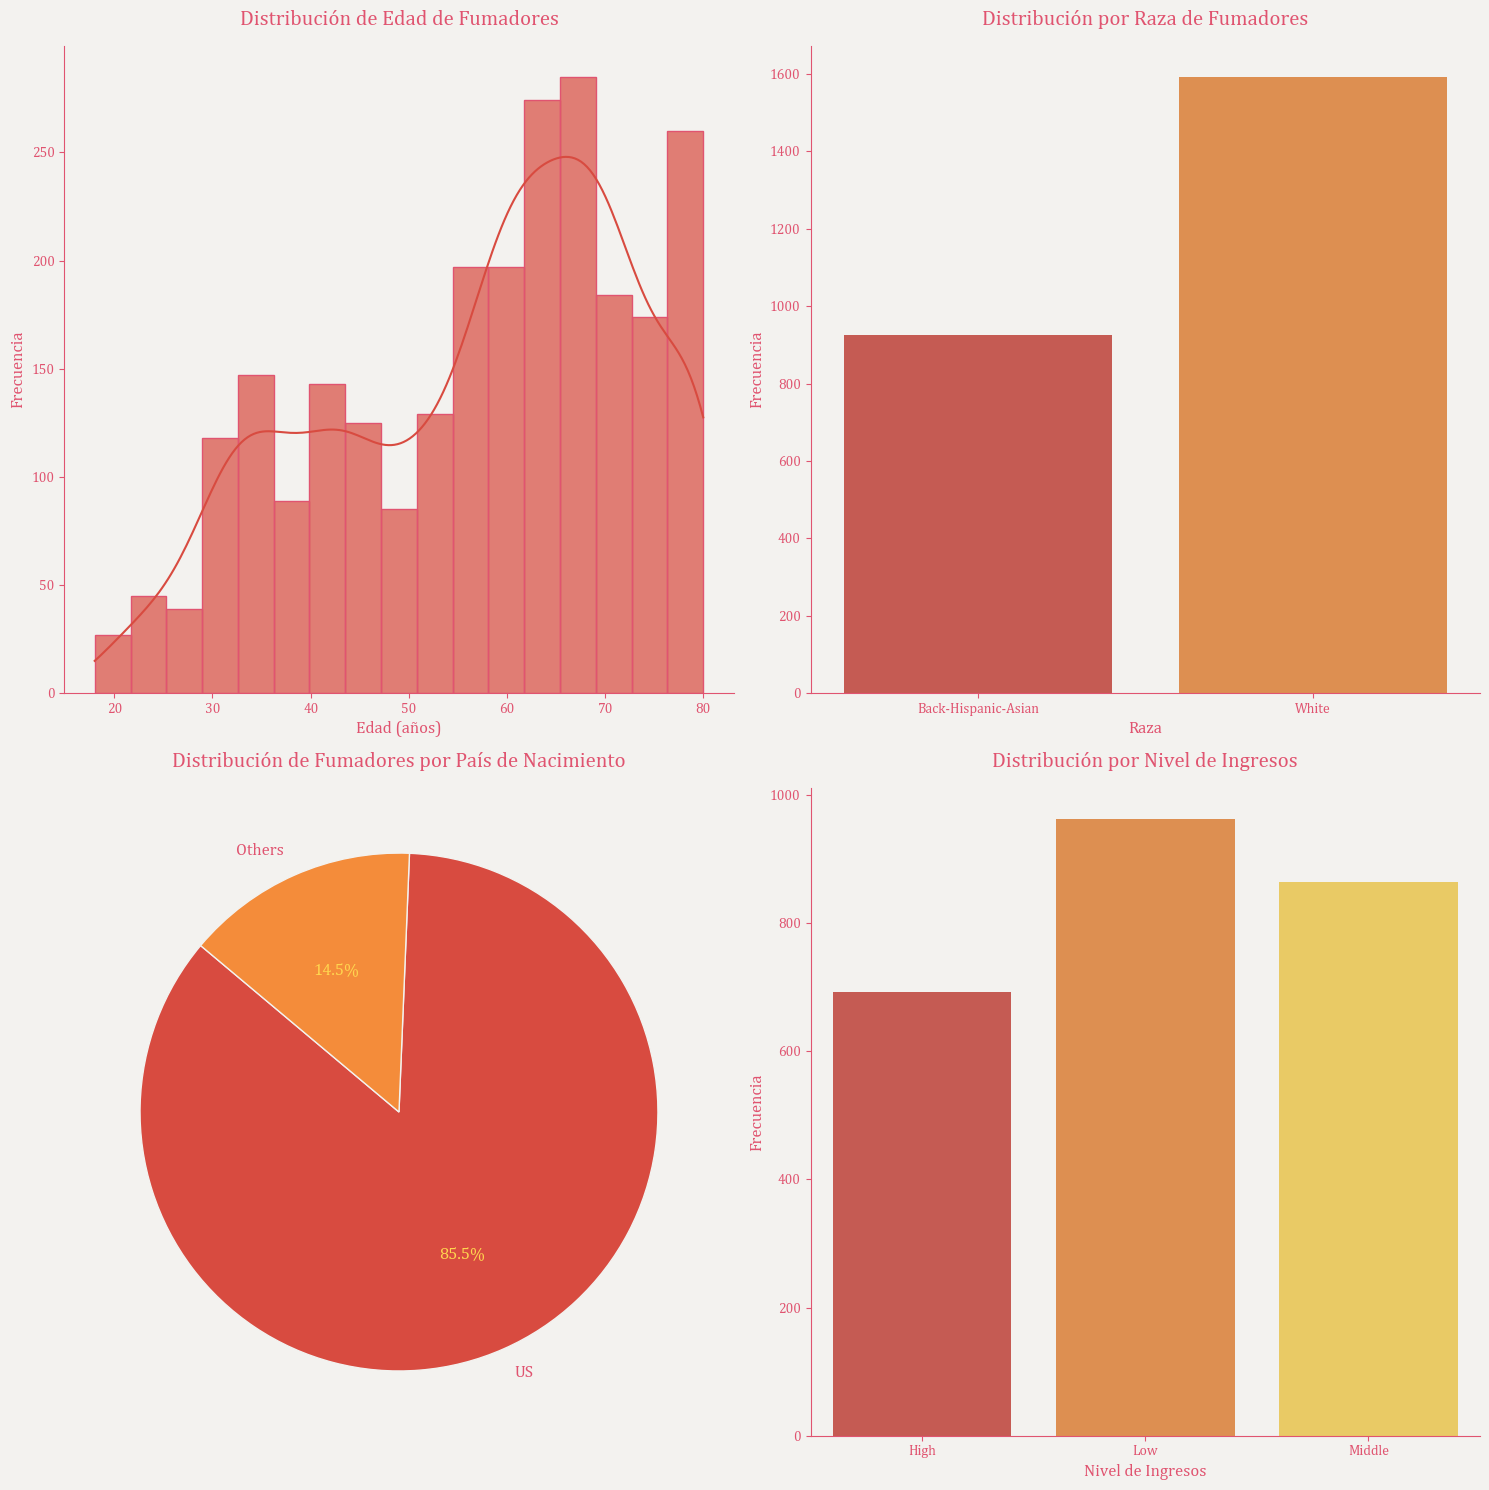

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar únicamente fumadores (120_cigarettes_life = "Yes") y eliminar "Dont know" o "Refused"
filtered_df = df_smoking[
    (df_smoking['100_cigarettes_life'] == "Yes") &
    (~df_smoking['100_cigarettes_life'].isin(["Dont know", "Refused"]))
]

# Crear figura con 4 subgráficas
fig, axes = plt.subplots(2, 2, figsize=(15, 15), facecolor='#F3F2EF')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Paleta de colores cálidos suaves
soft_warm_palette = ["#D84B40", "#F48C3A", "#FFD54F", "#E0947A", "#FFB27F"]
text_color = "#E05470"  # Color del texto y ejes
highlight_color = "#FFD54F"  # Amarillo para porcentajes en el pie chart

# Función para ajustar el estilo de los ejes
def stylize_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(text_color)
    ax.spines['bottom'].set_color(text_color)
    ax.tick_params(axis='both', colors=text_color, labelcolor=text_color)
    ax.yaxis.label.set_color(text_color)
    ax.xaxis.label.set_color(text_color)
    ax.title.set_color(text_color)

### 1. Histograma de Age (years) ###
axes[0, 0].set_facecolor('#F3F2EF')  # Fondo interno
sns.histplot(
    data=filtered_df,
    x='Age(year)',
    kde=True,
    color=soft_warm_palette[0],  # Rojo suave
    edgecolor=text_color,  # Bordes del histograma
    alpha=0.7,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Distribución de Edad de Fumadores", fontsize=15, pad=15)
axes[0, 0].set_xlabel("Edad (años)", fontsize=12)
axes[0, 0].set_ylabel("Frecuencia", fontsize=12)
stylize_axes(axes[0, 0])

### 2. Gráfico de barras por Races_simplify ###
axes[0, 1].set_facecolor('#F3F2EF')  # Fondo interno
sns.countplot(
    data=filtered_df,
    x='Races_simplify',
    palette=soft_warm_palette,  # Colorear según raza
    ax=axes[0, 1]
)
axes[0, 1].set_title("Distribución por Raza de Fumadores", fontsize=15, pad=15)
axes[0, 1].set_xlabel("Raza", fontsize=12)
axes[0, 1].set_ylabel("Frecuencia", fontsize=12)
stylize_axes(axes[0, 1])

### 3. Pie chart por Country_of_birth ###
axes[1, 0].set_facecolor('#F3F2EF')  # Fondo interno
country_counts = filtered_df['Country_of_birth'].value_counts()
wedges, texts, autotexts = axes[1, 0].pie(
    country_counts,
    labels=country_counts.index,
    autopct='%1.1f%%',
    colors=soft_warm_palette,
    textprops={'fontsize': 12, 'color': text_color},
    wedgeprops={'edgecolor': '#F3F2EF'},
    startangle=140
)
# Estilizar porcentajes en amarillo
for autotext in autotexts:
    autotext.set_color(highlight_color)

axes[1, 0].set_title("Distribución de Fumadores por País de Nacimiento", fontsize=15, pad=15, color="#E05470")

### 4. Gráfico de barras por Income_poverty ###
axes[1, 1].set_facecolor('#F3F2EF')  # Fondo interno
sns.countplot(
    data=filtered_df,
    x='Income_poverty',
    palette=soft_warm_palette,  # Colorear según nivel de ingresos
    ax=axes[1, 1]
)
axes[1, 1].set_title("Distribución por Nivel de Ingresos", fontsize=15, pad=15)
axes[1, 1].set_xlabel("Nivel de Ingresos", fontsize=12)
axes[1, 1].set_ylabel("Frecuencia", fontsize=12)
stylize_axes(axes[1, 1])

# Ajustar el layout
plt.tight_layout()

# Guardar la figura (opcional)
plt.savefig("./Figuras/smoking_demographics_filtered_colored_v2.png", bbox_inches="tight", dpi=300)

# Mostrar la figura
plt.show()


In [72]:
from scipy.stats import chisquare

# Conteo de frecuencias por raza
races_counts = filtered_df['Races_simplify'].value_counts()

# Prueba Chi-Cuadrado
stat, p_value = chisquare(races_counts)
print(f"Chi-Square Test: Statistic={stat:.3f}, p-value={p_value:.3e}")
if p_value < 0.05:
    print("El resultado es significativo: las frecuencias NO son uniformes.")
else:
    print("El resultado NO es significativo: las frecuencias son uniformes.")


Chi-Square Test: Statistic=177.214, p-value=1.967e-40
El resultado es significativo: las frecuencias NO son uniformes.


In [73]:
from statsmodels.stats.proportion import proportions_ztest

# Conteos por país de nacimiento
us_count = filtered_df[filtered_df['Country_of_birth'] == 'US'].shape[0]
total_count = filtered_df.shape[0]

# Prueba Binomial
stat, p_value = proportions_ztest(count=us_count, nobs=total_count, value=0.5, alternative='larger')
print(f"Z-Test (Binomial): Statistic={stat:.3f}, p-value={p_value:.3e}")
if p_value < 0.05:
    print("El resultado es significativo: los nacidos en EE.UU. representan más del 50%.")
else:
    print("El resultado NO es significativo: los nacidos en EE.UU. NO representan más del 50%.")


Z-Test (Binomial): Statistic=50.491, p-value=0.000e+00
El resultado es significativo: los nacidos en EE.UU. representan más del 50%.


In [74]:
# Conteo de frecuencias por nivel de ingresos
income_counts = filtered_df['Income_poverty'].value_counts()

# Prueba Chi-Cuadrado
stat, p_value = chisquare(income_counts)
print(f"Chi-Square Test: Statistic={stat:.3f}, p-value={p_value:.3e}")
if p_value < 0.05:
    print("El resultado es significativo: las frecuencias NO son uniformes.")
else:
    print("El resultado NO es significativo: las frecuencias son uniformes.")


Chi-Square Test: Statistic=44.515, p-value=2.157e-10
El resultado es significativo: las frecuencias NO son uniformes.


In [77]:
# Crear un nuevo DataFrame con proporciones relativas

df_smoking = df_smoking.drop(df_smoking[df_smoking['100_cigarettes_life'].isin(["Dont know", "Refused"])].index)

df_rel = (
    df_smoking
    .groupby(["Gender", "100_cigarettes_life"])
    .size()
    .reset_index(name='count')
)

# Calcular proporciones dentro de cada grupo de "Income_poverty"
df_rel['proportion'] = df_rel.groupby('Gender')['count'].transform(lambda x: x / x.sum())
df_rel

,Gender,100_cigarettes_life,count,proportion
0,Female,No,2279,0.656016
1,Female,Yes,1195,0.343984
2,Male,No,1531,0.536440
3,Male,Yes,1323,0.463560


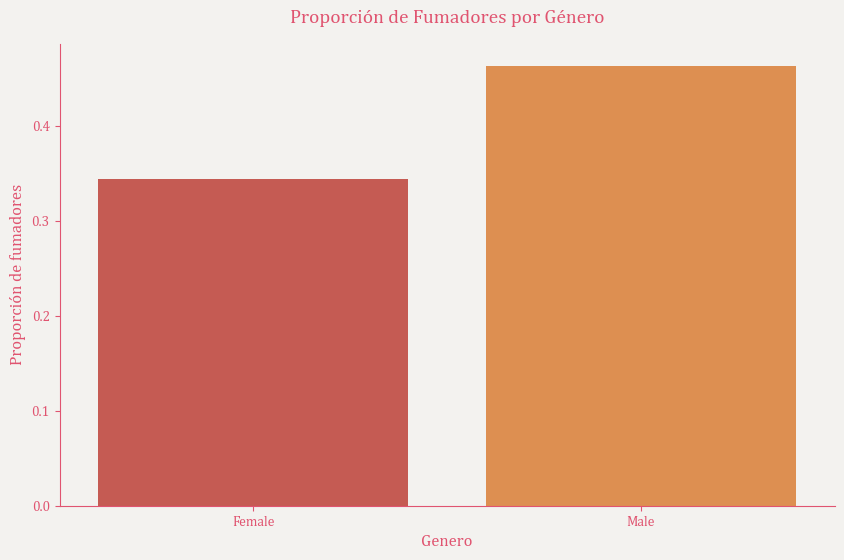

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los datos de riesgo alto
df_high = df_rel[df_rel['100_cigarettes_life'] == 'Yes']

# Crear el gráfico de barras con el filtro para "High"
plt.figure(figsize=(10, 6),facecolor='#F3F2EF')
sns.barplot(
    data=df_high,
    x="Gender",
    y="proportion",
    hue="Gender",
    palette=["#D84B40", "#F48C3A"]  # Colores cálidos suaves (rojo y naranja)
)

# Títulos y etiquetas con el mismo estilo de colores
plt.title("Proporción de Fumadores por Género", fontsize=14, color="#E05470", pad=15)
plt.xlabel("Genero", fontsize=12, color="#E05470")
plt.ylabel("Proporción de fumadores", fontsize=12, color="#E05470")

# Configuración de los ejes con el mismo color y sin bordes de arriba y derecha
plt.gca().tick_params(axis='x', colors="#E05470")
plt.gca().tick_params(axis='y', colors="#E05470")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color("#E05470")
plt.gca().spines['bottom'].set_color("#E05470")
plt.gca().set_facecolor('#F3F2EF')  # Fondo interior de la gráfica

# Establecer el fondo interior del gráfico
plt.gca().set_facecolor('#F3F2EF')

plt.savefig("./Figuras/gender_fumadores.png", bbox_inches="tight", dpi=300)

# Mostrar el gráfico
plt.show()

In [79]:
from statsmodels.stats.proportion import proportions_ztest

# Contar las frecuencias de cada género
gender_counts = df_rel['Gender'].value_counts()

# Número total de observaciones
total = gender_counts.sum()

# Número de hombres y mujeres
male_count = gender_counts.get('Female', 0)
female_count = gender_counts.get('Male', 0)

# Realizar la prueba de Z para proporciones (comparando la proporción de hombres contra una proporción teórica de 50%)
successes = [male_count, female_count]
n = [total, total]  # El total es el mismo para ambos grupos
stat, p_value = proportions_ztest(successes, n, value=0.5)

# Mostrar resultados
print(f"Estadístico Z: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("La proporción de hombres en el grupo de alto riesgo cardiovascular difiere significativamente del 50%.")
else:
    print("No hay diferencias significativas en la proporción de hombres en el grupo de alto riesgo cardiovascular.")


Estadístico Z: -1.4142
p-valor: 0.1573
No hay diferencias significativas en la proporción de hombres en el grupo de alto riesgo cardiovascular.


# WEIGTH HISTORIC

In [60]:
df_weight_historic = pd.read_csv("./data/Data_processed/df_weigth_historic.csv")
df_weight_historic['Year'] = df_weight_historic['Year'].astype(str)
#df_weight_historic = df_weight_historic.sort_values(by='Year', ascending=False)
df_weight_historic.Year.unique()
df_filtered = df_weight_historic[df_weight_historic['IMC_category'].isin(['Overweight', 'Obesity'])]
df_filtered.IMC_category.value_counts()
df_filtered.Year.value_counts()

C:\Users\rodri\AppData\Local\Temp\ipykernel_172\434154336.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weight_historic = pd.read_csv("./data/Data_processed/df_weigth_historic.csv")


Year
2023        5673
pandemic    5627
2009        3733
2007        3488
2013        3406
2017        3371
2015        3357
2001        3299
2011        3159
2003        3131
2005        3029
Name: count, dtype: int64

C:\Users\rodri\AppData\Local\Temp\ipykernel_172\242502673.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Year"] = df_filtered["Year"].replace("pandemic", 2020)
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\242502673.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Year"] = pd.to_numeric(df_filtered["Year"], errors='coerce')
C:\Users\rodri\AppData\Local\Temp\ipykernel_172\242502673.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same

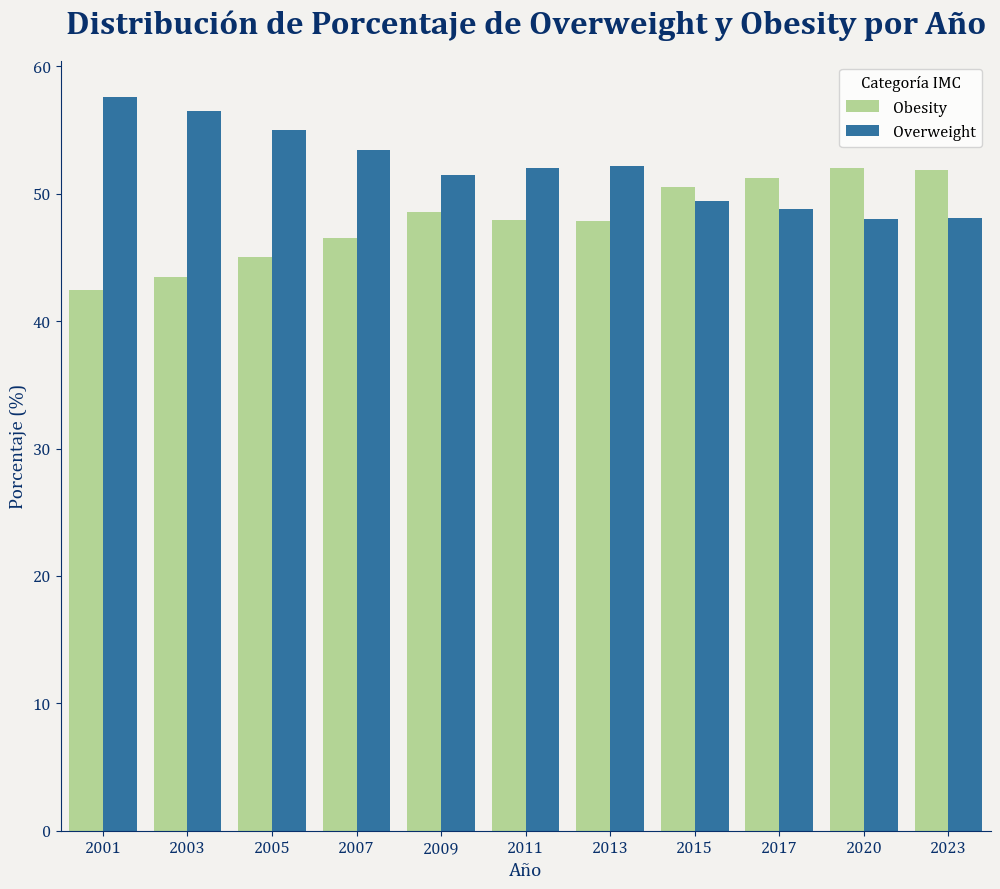

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Nueva paleta de colores personalizada basada en "YlGnBu"
custom_palette = ["#b2df8a", "#1f78b4", "#08306b"]  # Azul oscuro, azul medio, verde claro
background_color = "#F3F2EF"  # Fondo neutro claro
text_color = "#08306b"  # Texto en azul oscuro

# Configuración de fuente
plt.rcParams["font.family"] = "serif"  # Usa serif que se parece a Cambria Math
plt.rcParams["font.serif"] = ["Cambria", "Times New Roman", "DejaVu Serif"]  # Opciones alternativas

# Filtrar los datos para mantener solo las categorías "Overweight" y "Obesity"
df_filtered = df_weight_historic[df_weight_historic['IMC_category'].isin(['Overweight', 'Obesity'])]

# Reemplazar "pandemic" por un valor numérico (ejemplo: 2020)
df_filtered["Year"] = df_filtered["Year"].replace("pandemic", 2020)

# Convertir la columna "Year" a tipo numérico
df_filtered["Year"] = pd.to_numeric(df_filtered["Year"], errors='coerce')

# Eliminar los valores nulos (NaN)
df_filtered = df_filtered.dropna(subset=["Year"])

# Calcular el conteo por año y categoría IMC
df_count = df_filtered.groupby(['Year', 'IMC_category']).size().reset_index(name='count')

# Calcular el porcentaje para cada categoría por año
df_count['percentage'] = df_count.groupby('Year')['count'].transform(lambda x: x / x.sum() * 100)

# Crear figura y fondo
plt.figure(figsize=(12, 10), facecolor=background_color)

# Crear el gráfico de barras con hue para las categorías
sns.barplot(
    x='Year', 
    y='percentage', 
    hue='IMC_category', 
    data=df_count, 
    palette=custom_palette,  # Usar la paleta personalizada
    ci=None  # Desactivar el intervalo de confianza
)

# Títulos y etiquetas
plt.title("Distribución de Porcentaje de Overweight y Obesity por Año", fontsize=24, color=text_color, fontweight='bold', pad=20)
plt.xlabel("Año", fontsize=14, color=text_color)
plt.ylabel("Porcentaje (%)", fontsize=14, color=text_color)

# Personalización de ejes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(text_color)
plt.gca().spines['bottom'].set_color(text_color)
plt.tick_params(axis='x', colors=text_color, labelsize=12)
plt.tick_params(axis='y', colors=text_color, labelsize=12)

# Eliminar la rejilla (grid)
plt.grid(False)

# Fondo uniforme de la gráfica
plt.gca().set_facecolor(background_color)

# Ajustar leyenda
plt.legend(title='Categoría IMC', title_fontsize=12, fontsize=12, loc='best')

# Mostrar el gráfico
plt.savefig("./Figuras/obesity_historic.png", bbox_inches="tight", dpi=300)

plt.show()




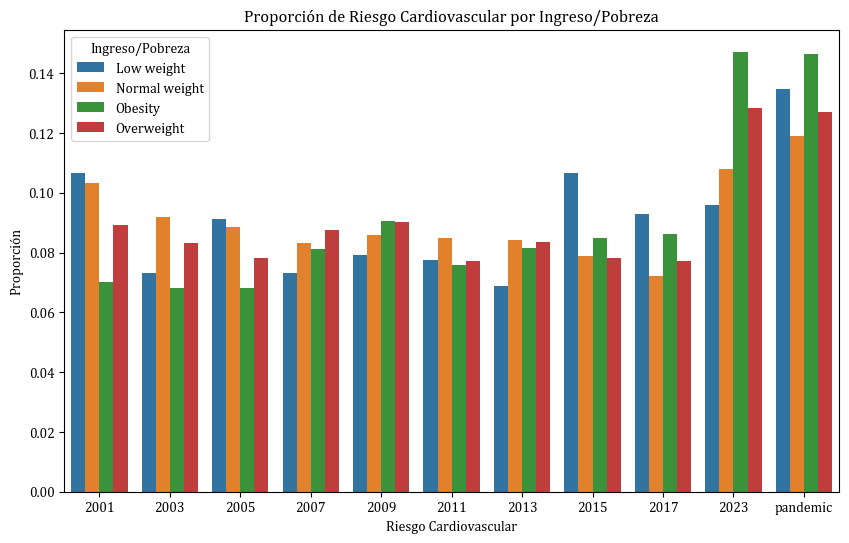

In [62]:
# Crear un nuevo DataFrame con proporciones relativas
df_rel = (
    df_weight_historic
    .groupby(["IMC_category", "Year"])
    .size()
    .reset_index(name='count')
)

# Calcular proporciones dentro de cada grupo de "Income_poverty"
df_rel['proportion'] = df_rel.groupby('IMC_category')['count'].transform(lambda x: x / x.sum())


# Plot de proporciones
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_rel,
    x="Year",
    y="proportion",
    hue="IMC_category"
)
plt.title("Proporción de Riesgo Cardiovascular por Ingreso/Pobreza")
plt.ylabel("Proporción")
plt.xlabel("Riesgo Cardiovascular")
plt.legend(title="Ingreso/Pobreza")
plt.show()

In [63]:
risk4 = pd.read_csv("./data/Data_processed/df_risk4.csv")
risk4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            685 non-null    float64
 1   Total_Cholesterol(mmol/L)       685 non-null    float64
 2   HDL-Cholesterol(mmol/L)         685 non-null    float64
 3   Cholesterol_index               685 non-null    float64
 4   Cardiovascular_risk_1           685 non-null    object 
 5   Height(m)_y                     685 non-null    float64
 6   Weight(Kg)_y                    685 non-null    float64
 7   Weight(year_ago)_y              685 non-null    float64
 8   Try_to_loss_weight_y            685 non-null    float64
 9   IMC_y                           685 non-null    float64
 10  IMC_category_y                  685 non-null    object 
 11  Year_y                          685 non-null    int64  
 12  Insulin(pmol/L)                 685 

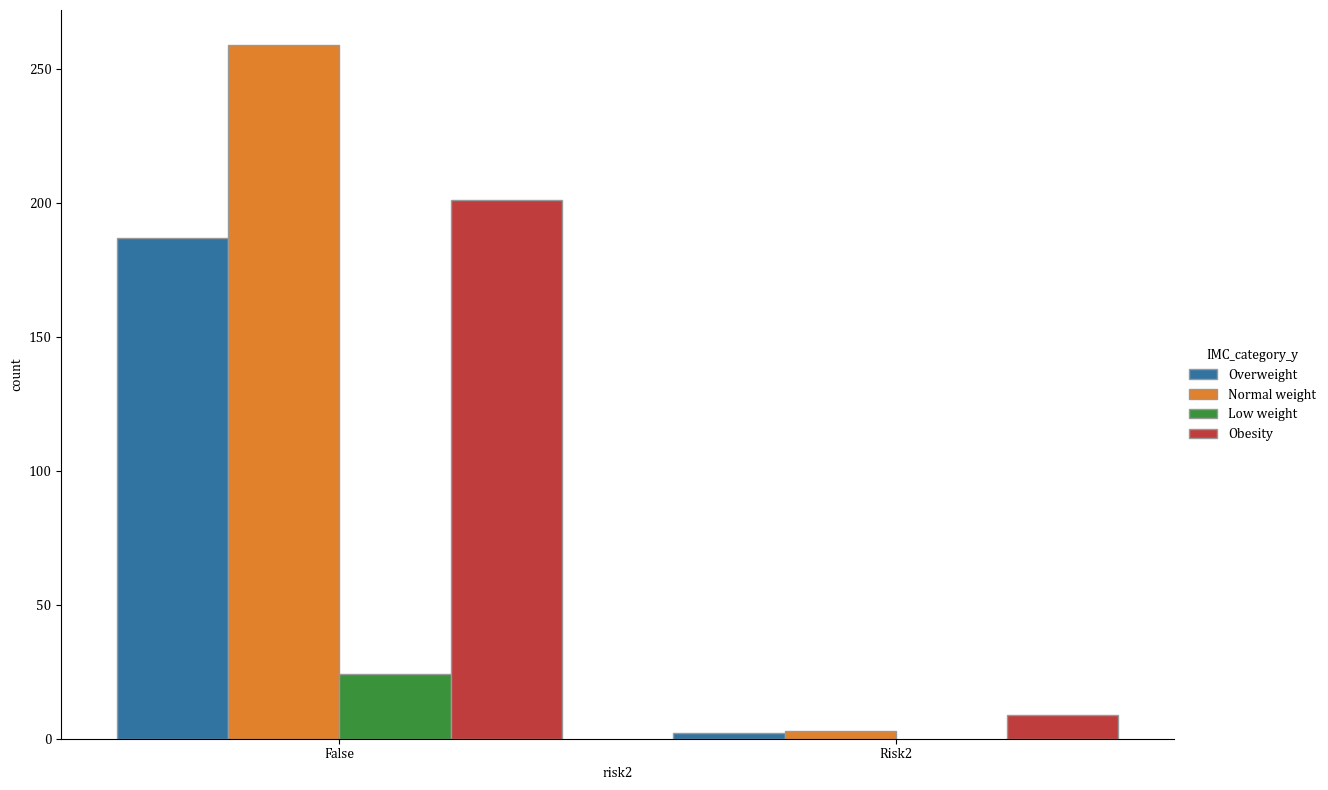

In [64]:

# Ajustamos la altura y la relación de aspecto de la figura
sns.catplot(x="risk2",
            hue="IMC_category_y",
            kind="count",
            edgecolor=".6",
            orient="V",
            data=risk4.sort_values("risk2"),
            height=8,  # Altura de la figura
            aspect=1.5)  # Relación de aspecto (ancho/alto)